In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from dateutil.relativedelta import relativedelta
import yfinance as yf
import seaborn as sns
sns.set(style='darkgrid')
from kneed import KneeLocator
from sklearn.metrics import r2_score
from colorama import Fore, Style
from math import ceil, floor

import sys
sys.path.append('../src')
from stock_strategy import stock_strategy
from utils import (
    # stock_trading_strategy,
    # stock_trading_strategy_supp_resist,
    # plot_trading_strategy,
    # download_stock_df,
    # user_function,
    plot_candlestick,
)

## Test effectiveness of support and resistance in option trading

### Strategy 1:
* Touch support: long call
* Touch resistance: long put

#### Fail

### Strategy 2:

* Touch support
    * reflect: long call
    * break: long put
* Touch resistance:
    * reflect: long put
    * break: long call
    
#### Key question: how to confirm break / reflect?

* Base assumption: assume the support and resistance to hold, unless strong conflict signal observed.
* Assumption1.1: when going down, a short red line / long green line confirm reflect; long red line confirm break
* Assumption1.2: when going up, a short green line / long red line confirm reflect; long green line confirm break
* ~~Read from 1-min Candlestick~~ -- not applicable
* Check if trend is align with QQQ/SPY


#### Stop revenue needed; for conservative, start with 20%.

#### Precision of level should be relative to the stock price.

#### Hard to validate/'

### Strategy 3: 

* Touch support / resistance: check with the daily price range, 95% confidence

QQQ & TQQQ

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 431.0 ~ up 442.89 , down 423.99
Latest 20 Day MA: 433.04
Latest Lower Bollinger Band, 20MA: 414.82
Latest Higher Bollinger Band, 20MA: 451.25
Latest 50 Day MA: 436.69
Latest Lower Bollinger Band, 50MA: 417.58
Latest Higher Bollinger Band, 50MA: 455.79

Latest RSI: 42.47 
Latest MACD Divergence: -0.65 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 552.66
20MA break point: 433.14
20MA Lower Bollinger Band break point: 411.44
20MA Upper Bollinger Band break point: 454.84
50MA break point: 436.8
50MA Lower Bollinger Band break point: 416.02
50MA Upper Bollinger Band break point: 457.59
[[323.09937286]
 [344.07285854]
 [355.29678454]
 [364.09666795]
 [372.7549977 ]
 [384.82869555]
 [397.41999817]
 [407.64368479]
 [423.9923084 ]
 [437.57699738]]
[[324.44333903]
 [336.72285679]
 [356.256073  ]
 [365.66965248]
 [372.08281326]
 [378.99090854]
 [389.0744

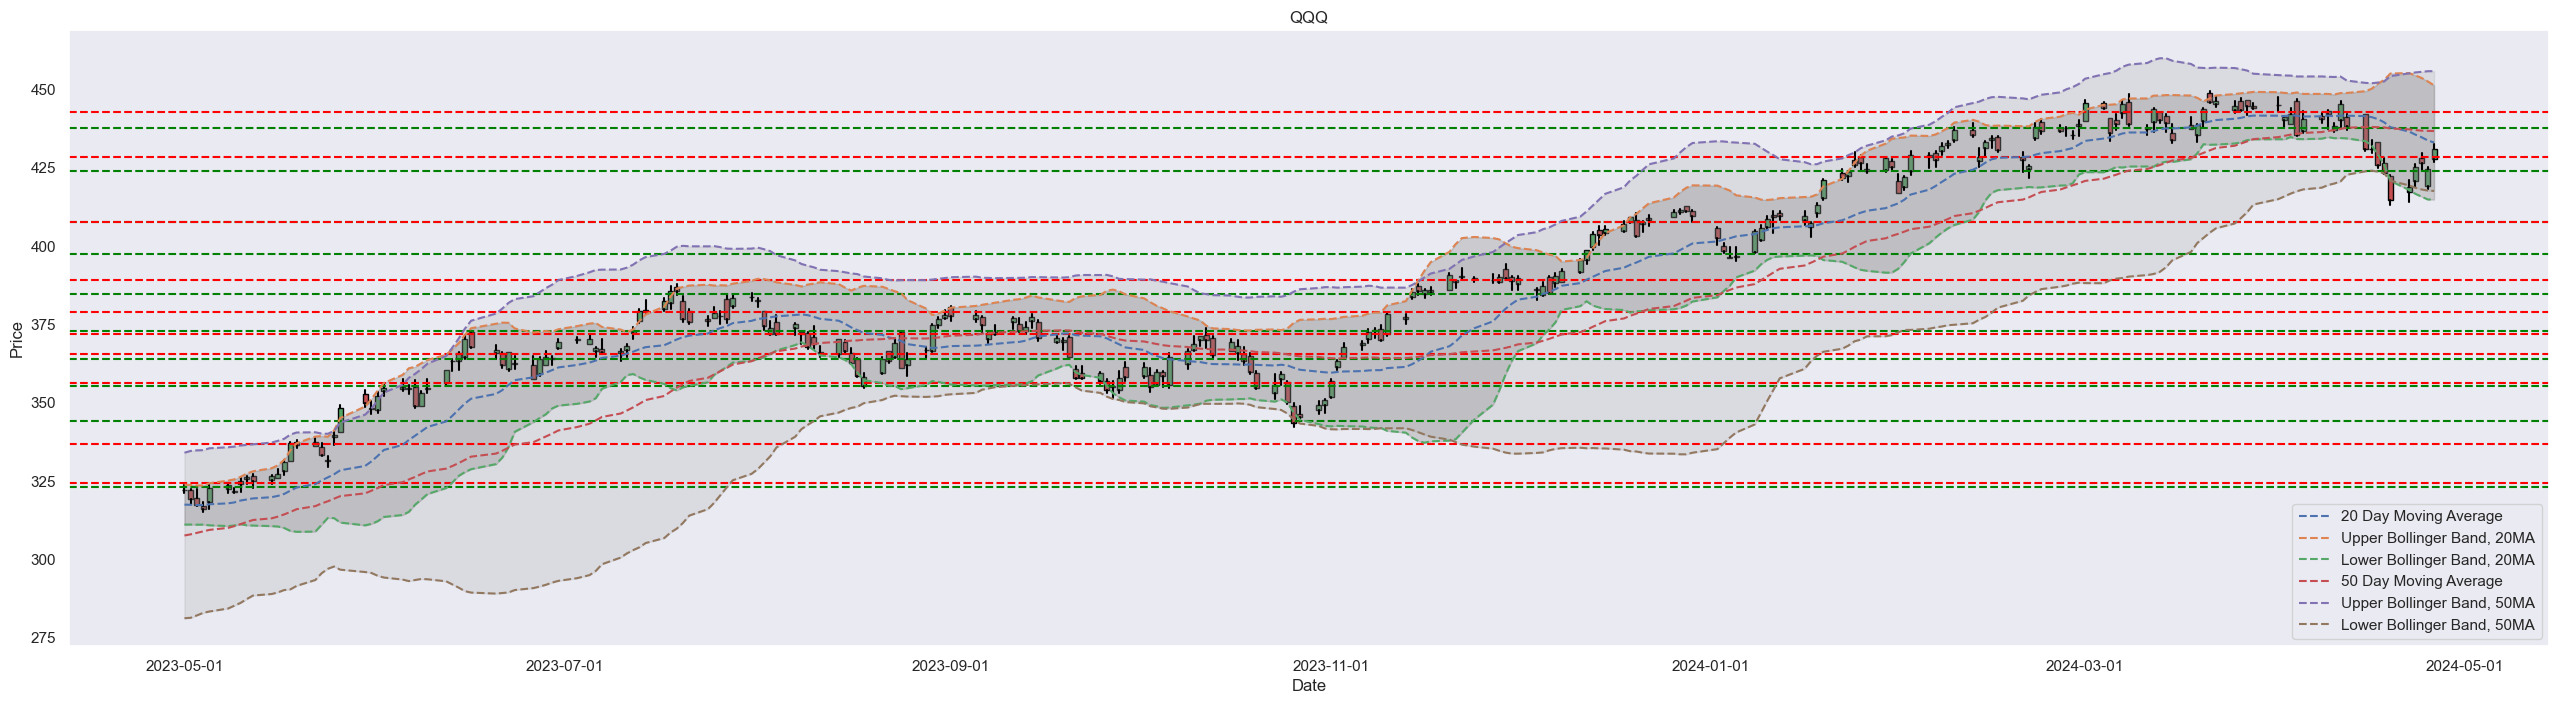

In [2]:
stock_strategy('qqq', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('qqq').latest_metric()
stock_strategy('qqq').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 55.28 ~ up 56.24 , down 54.41
Latest 20 Day MA: 56.69
Latest Lower Bollinger Band, 20MA: 49.07
Latest Higher Bollinger Band, 20MA: 64.31
Latest 50 Day MA: 58.8
Latest Lower Bollinger Band, 50MA: 50.57
Latest Higher Bollinger Band, 50MA: 67.04

Latest RSI: 40.66 
Latest MACD Divergence: -0.27 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 125.7
20MA break point: 56.76
20MA Lower Bollinger Band break point: 47.7
20MA Upper Bollinger Band break point: 65.83
50MA break point: 58.87
50MA Lower Bollinger Band break point: 49.97
50MA Upper Bollinger Band break point: 67.78
[[27.82692308]
 [31.63846207]
 [35.3482353 ]
 [38.53046506]
 [41.60852937]
 [44.44772738]
 [49.26208321]
 [54.41318148]
 [58.50687528]
 [61.25545467]]
[[28.78692304]
 [32.25599995]
 [36.42032242]
 [39.61809494]
 [42.40705883]
 [45.41620675]
 [50.79916668]
 [56.23227223]
 [60.1047993

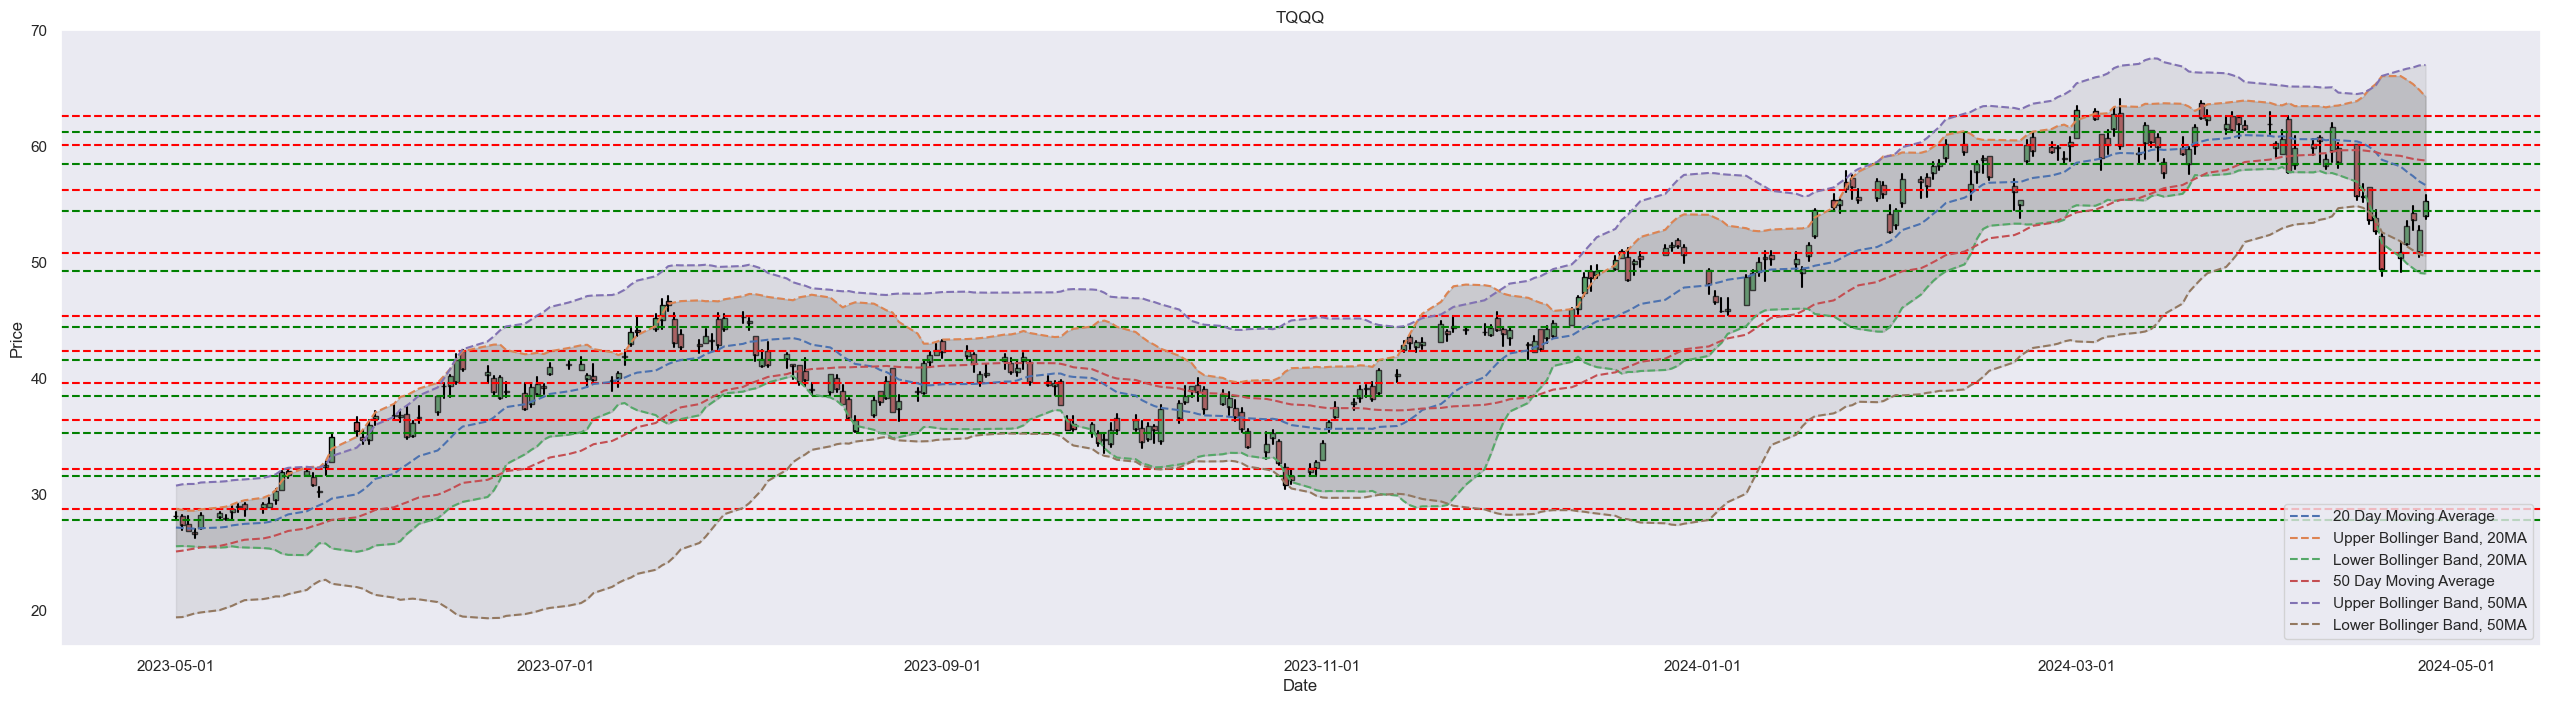

In [3]:
stock_strategy('tqqq', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('tqqq').latest_metric()
stock_strategy('tqqq').infer_metric()

SPY & UPRO

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 508.26 ~ up 508.63 , down 497.03
Latest 20 Day MA: 509.93
Latest Lower Bollinger Band, 20MA: 493.25
Latest Higher Bollinger Band, 20MA: 526.62
Latest 50 Day MA: 511.03
Latest Lower Bollinger Band, 50MA: 491.68
Latest Higher Bollinger Band, 50MA: 530.38

Latest RSI: 39.53 
Latest MACD Divergence: -0.55 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 544.8
20MA break point: 510.02
20MA Lower Bollinger Band break point: 490.13
20MA Upper Bollinger Band break point: 529.91
50MA break point: 511.09
50MA Lower Bollinger Band break point: 489.95
50MA Upper Bollinger Band break point: 532.22
[[412.13892909]
 [424.10374832]
 [434.89976892]
 [445.739116  ]
 [453.98321206]
 [470.99920166]
 [486.38916779]
 [497.03293565]
 [508.28600098]
 [518.1499939 ]]
[[415.88000019]
 [428.78963103]
 [439.49209098]
 [449.46700134]
 [457.18448297]
 [474.65583547]
 [488.059

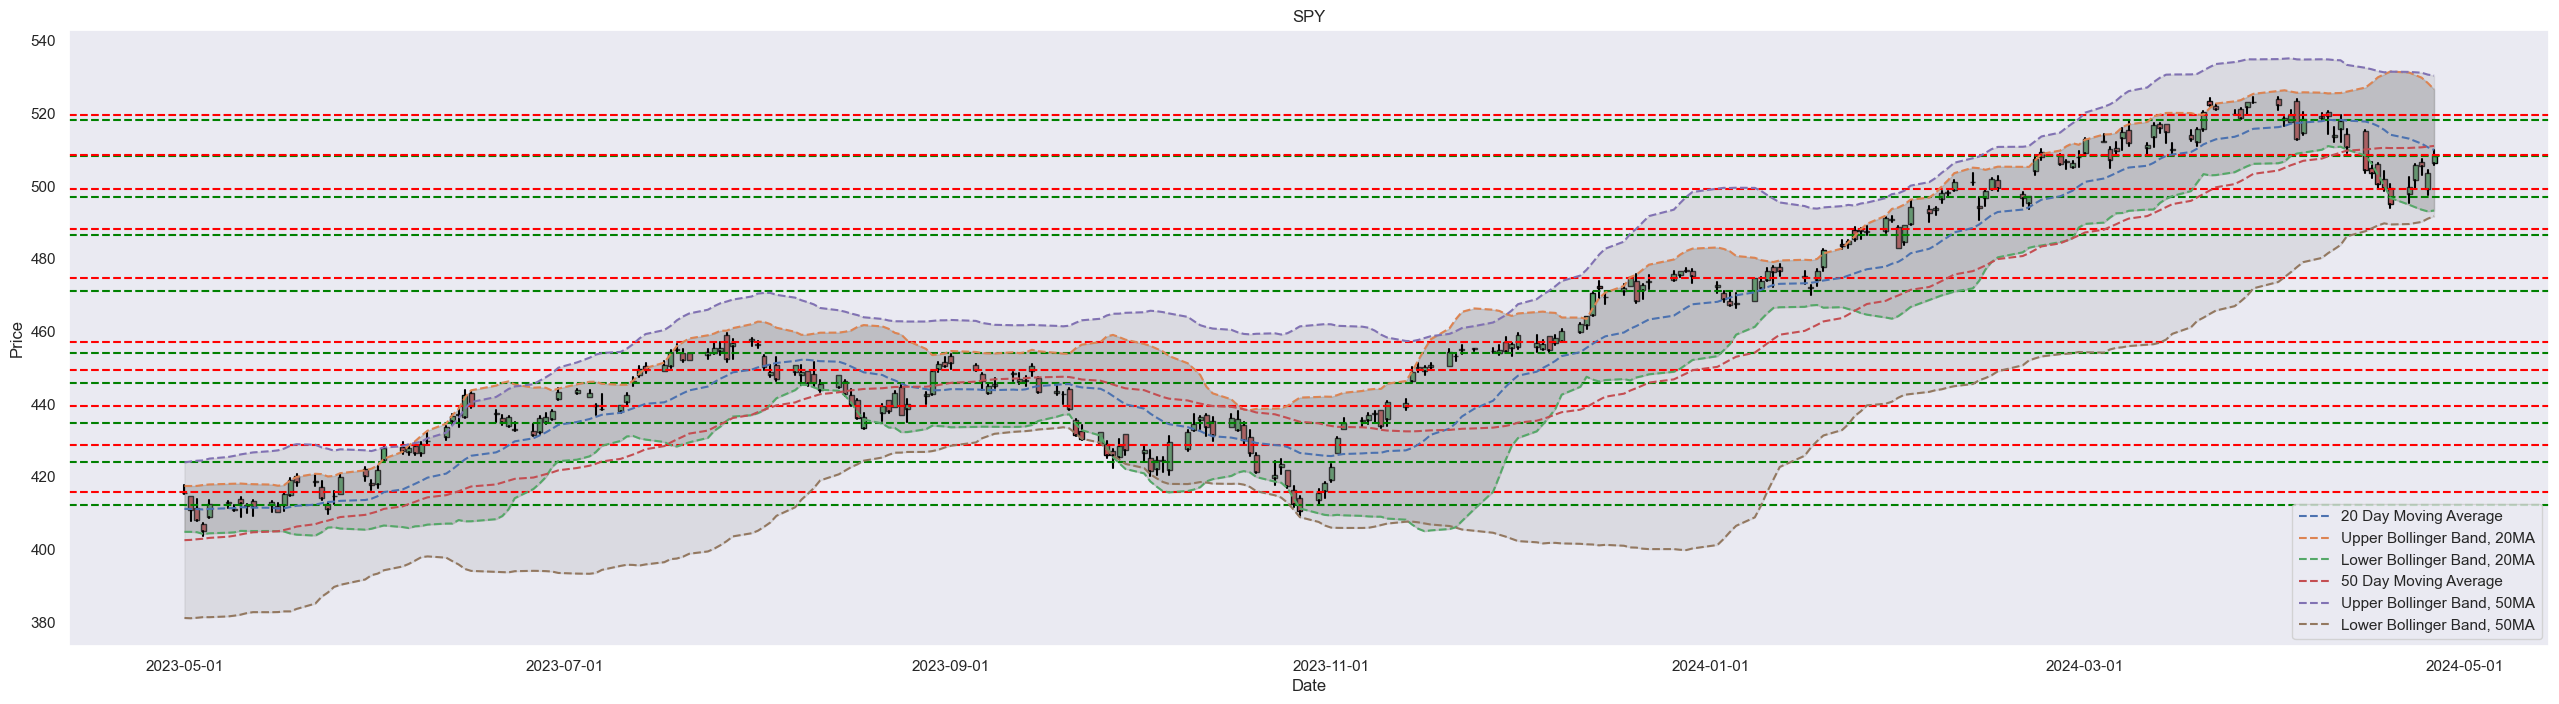

In [4]:
stock_strategy('spy', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('spy').latest_metric()
stock_strategy('spy').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 63.82 ~ up 66.04 , down 61.64
Latest 20 Day MA: 64.93
Latest Lower Bollinger Band, 20MA: 58.07
Latest Higher Bollinger Band, 20MA: 71.78
Latest 50 Day MA: 65.8
Latest Lower Bollinger Band, 50MA: 58.17
Latest Higher Bollinger Band, 50MA: 73.43

Latest RSI: 37.84 
Latest MACD Divergence: -0.23 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 92.76
20MA break point: 64.99
20MA Lower Bollinger Band break point: 56.83
20MA Upper Bollinger Band break point: 73.14
50MA break point: 65.84
50MA Lower Bollinger Band break point: 57.53
50MA Upper Bollinger Band break point: 74.15
[[38.28088233]
 [41.75516165]
 [44.81677394]
 [47.4264445 ]
 [50.36133347]
 [53.49272693]
 [58.35823553]
 [61.640625  ]
 [65.40521705]
 [69.0345452 ]]
[[38.67105243]
 [40.90333394]
 [43.54999989]
 [46.78681807]
 [49.65341475]
 [54.37440033]
 [58.90583324]
 [62.41894752]
 [66.033749

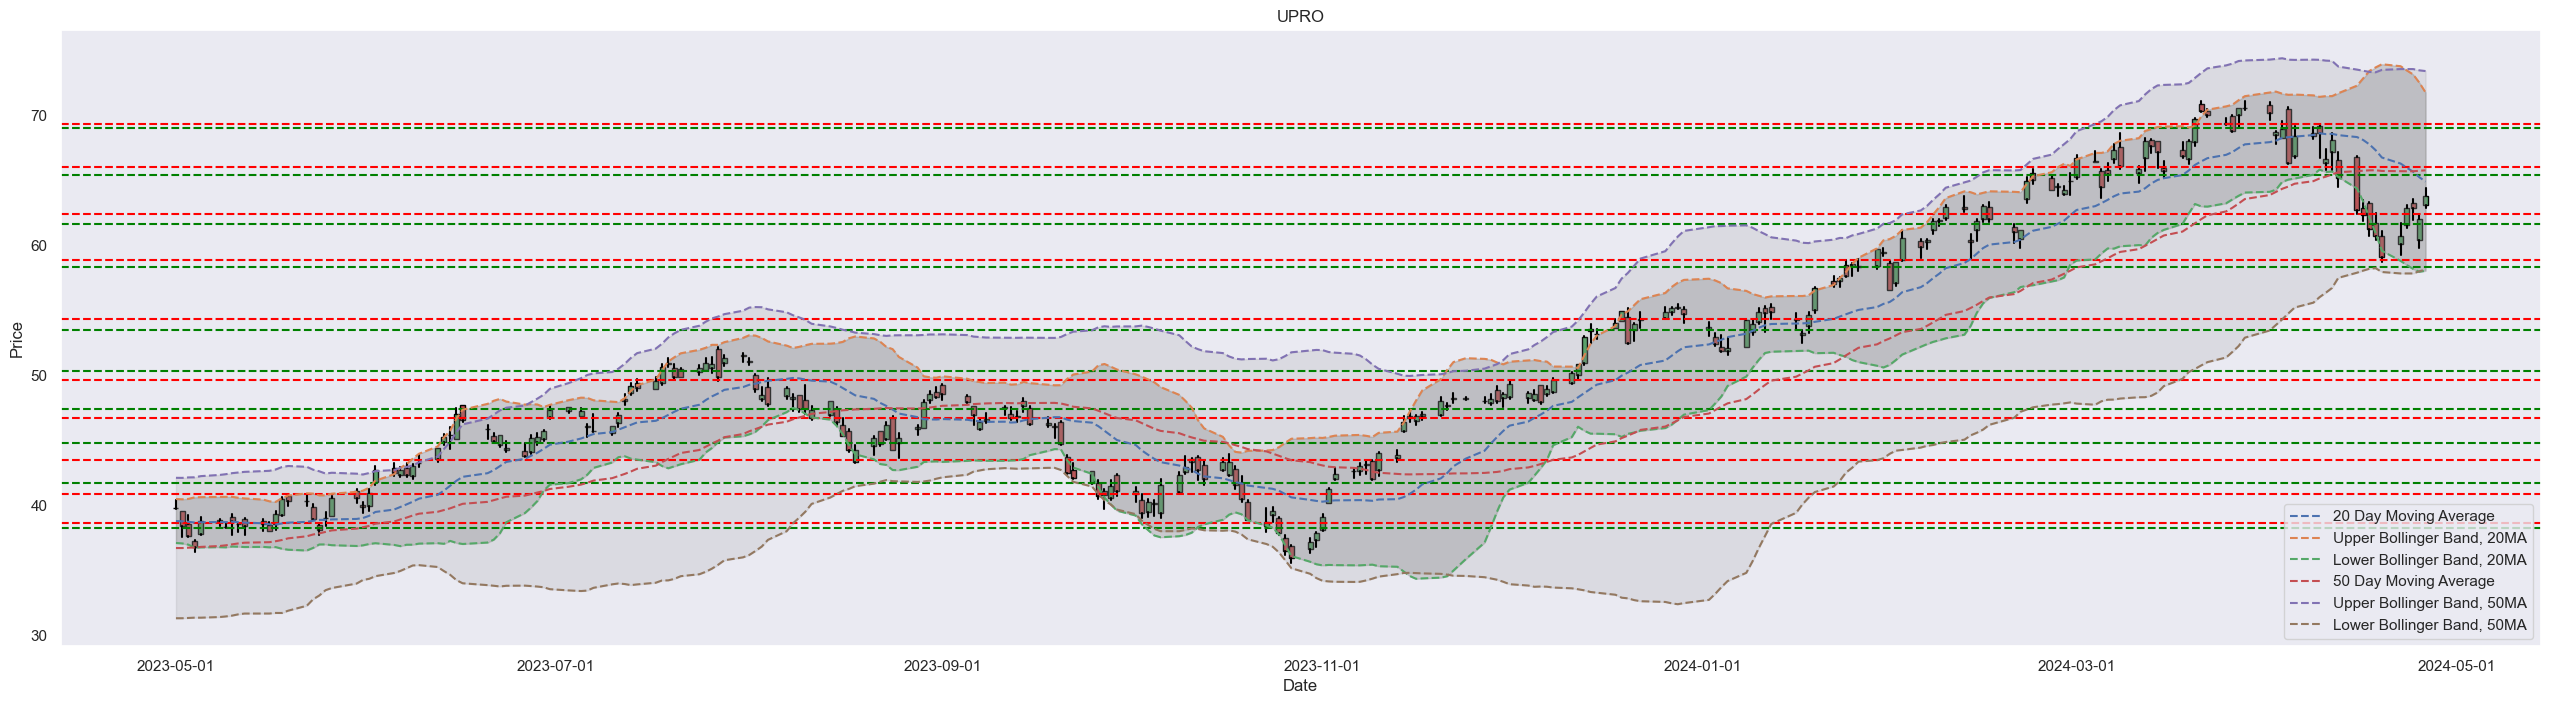

In [5]:
stock_strategy('upro', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('upro').latest_metric()
stock_strategy('upro').infer_metric()

SOXX & SOXL

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 216.9 ~ up 227.11 , down 213.3
Latest 20 Day MA: 216.15
Latest Lower Bollinger Band, 20MA: 199.03
Latest Higher Bollinger Band, 20MA: 233.27
Latest 50 Day MA: 218.67
Latest Lower Bollinger Band, 50MA: 197.6
Latest Higher Bollinger Band, 50MA: 239.73

Latest RSI: 45.61 
Latest MACD Divergence: -0.36 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 300.77
20MA break point: 216.11
20MA Lower Bollinger Band break point: 195.69
20MA Upper Bollinger Band break point: 236.53
50MA break point: 218.7
50MA Lower Bollinger Band break point: 195.66
50MA Upper Bollinger Band break point: 241.74
[[136.42472076]
 [146.05472056]
 [155.66020966]
 [161.98163011]
 [169.9334668 ]
 [183.78516769]
 [196.24764745]
 [204.9964447 ]
 [213.30166626]
 [222.59759827]]
[[138.84694544]
 [148.36750158]
 [158.64707114]
 [165.28634048]
 [171.75579701]
 [179.51488953]
 [190.695502

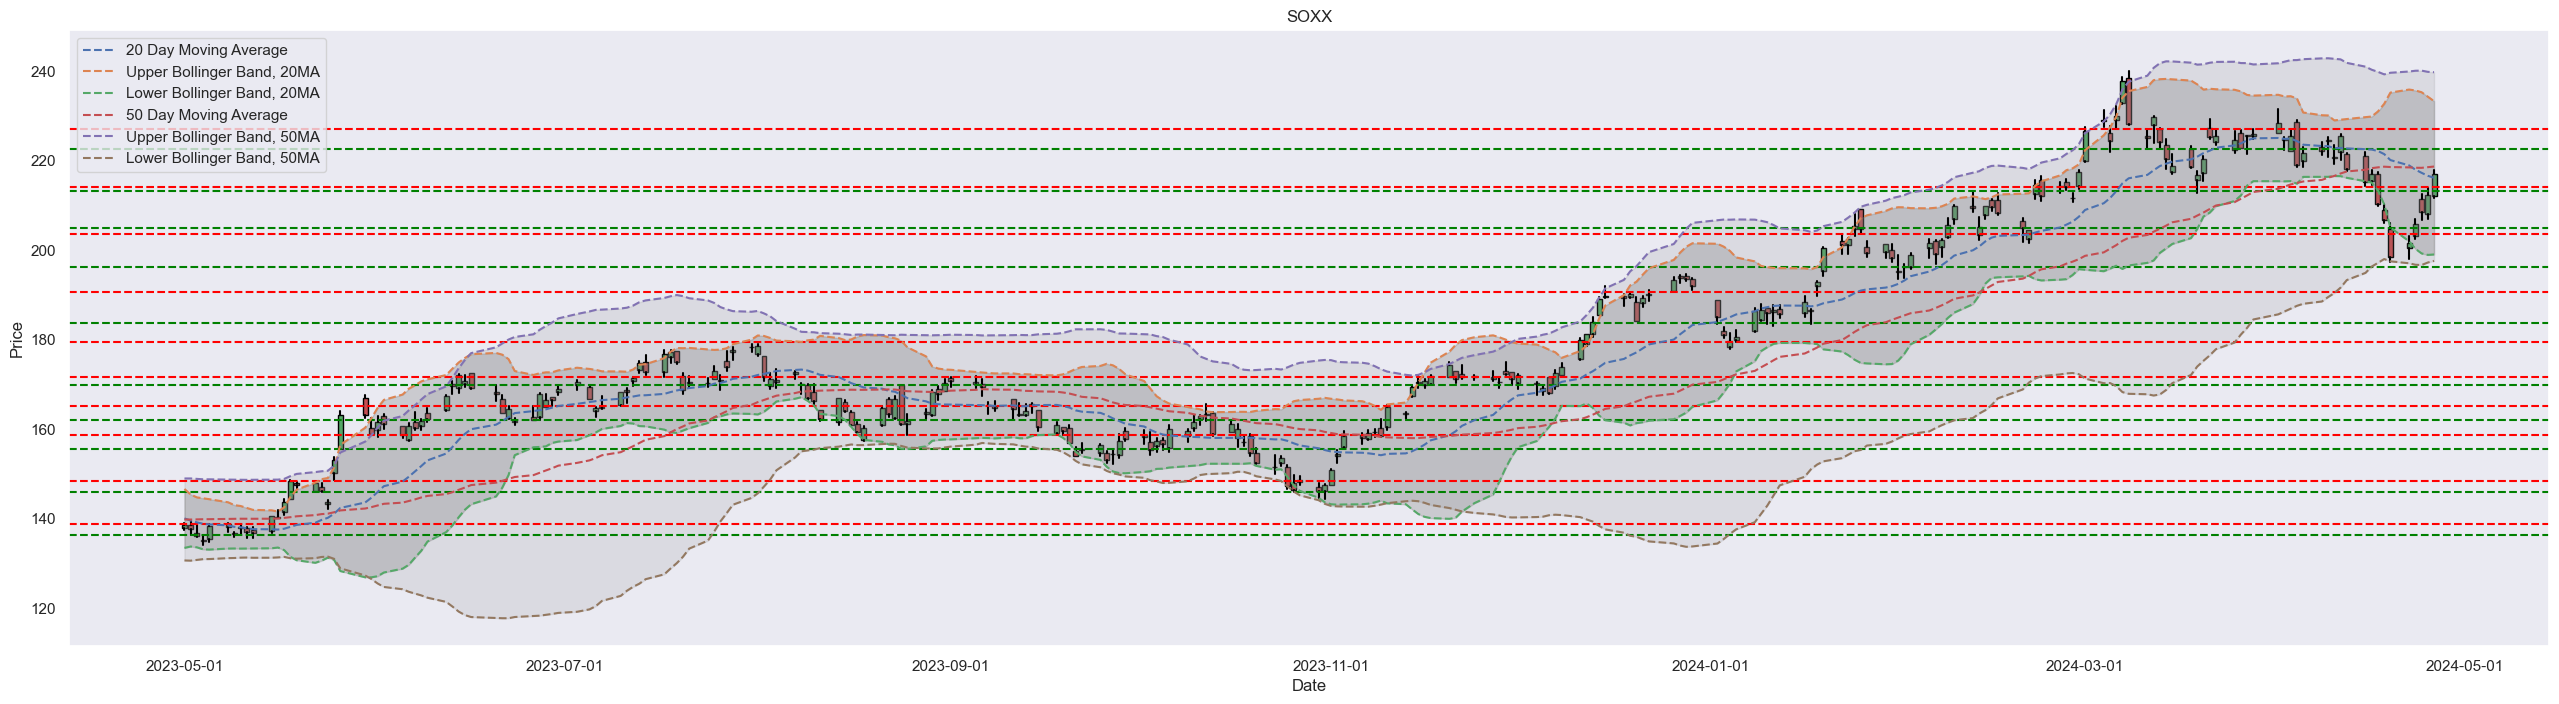

In [6]:
stock_strategy('soxx', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('soxx').latest_metric()
stock_strategy('soxx').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 39.8 ~ up 43.46 , down 35.02
Latest 20 Day MA: 40.39
Latest Lower Bollinger Band, 20MA: 30.26
Latest Higher Bollinger Band, 20MA: 50.52
Latest 50 Day MA: 42.73
Latest Lower Bollinger Band, 50MA: 30.19
Latest Higher Bollinger Band, 50MA: 55.27

Latest RSI: 43.43 
Latest MACD Divergence: -0.25 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 117.82
20MA break point: 40.42
20MA Lower Bollinger Band break point: 28.34
20MA Upper Bollinger Band break point: 52.5
50MA break point: 42.79
50MA Lower Bollinger Band break point: 29.12
50MA Upper Bollinger Band break point: 56.46
[[14.29190481]
 [17.72428567]
 [20.7271795 ]
 [23.21125003]
 [26.60074079]
 [30.95555539]
 [35.02999954]
 [40.33249989]
 [44.73999988]
 [49.65499973]]
[[15.21904759]
 [19.12175002]
 [22.73729165]
 [25.37076931]
 [29.3592307 ]
 [34.56666656]
 [39.47124958]
 [43.45785686]
 [47.676666

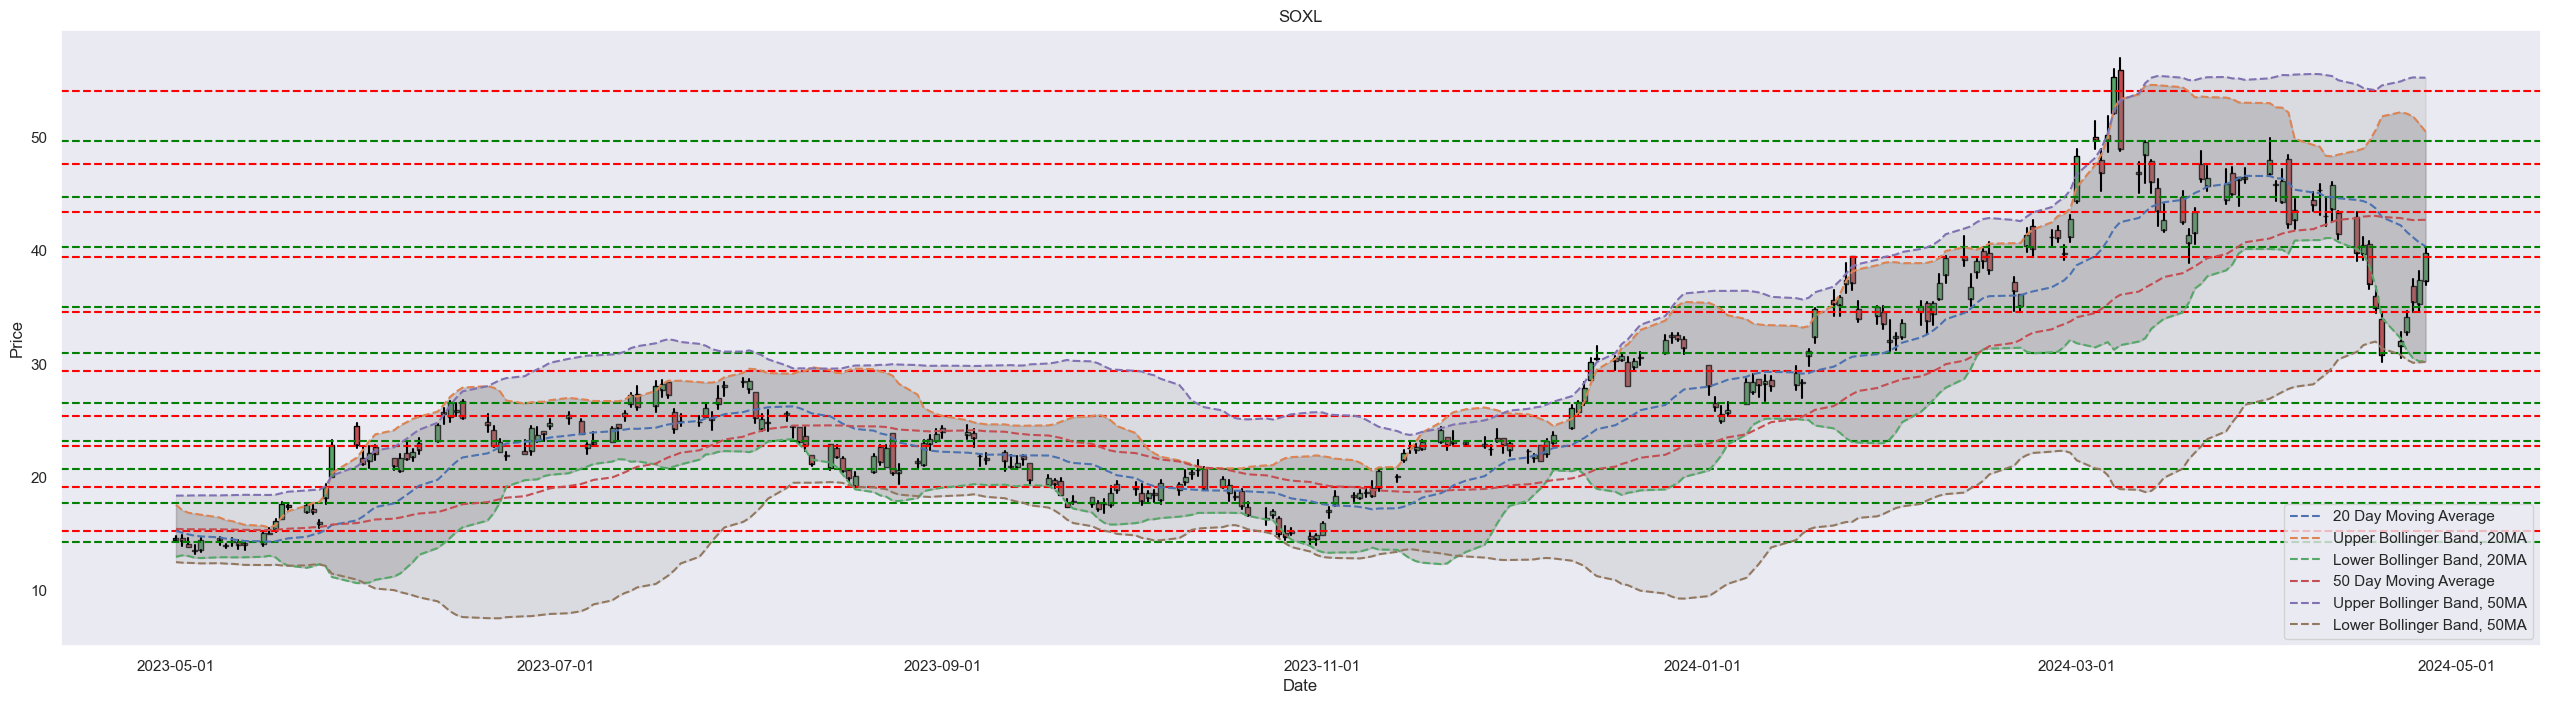

In [7]:
stock_strategy('soxl', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('soxl').latest_metric()
stock_strategy('soxl').infer_metric()

NVDA & NVDL

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 877.35 ~ up 891.81 , down 852.31
Latest 20 Day MA: 855.66
Latest Lower Bollinger Band, 20MA: 778.65
Latest Higher Bollinger Band, 20MA: 932.67
Latest 50 Day MA: 850.86
Latest Lower Bollinger Band, 50MA: 692.19
Latest Higher Bollinger Band, 50MA: 1009.53

Latest RSI: 50.71 
Latest MACD Divergence: -4.19 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 717.21
20MA break point: 854.52
20MA Lower Bollinger Band break point: 763.45
20MA Upper Bollinger Band break point: 945.59
50MA break point: 850.32
50MA Lower Bollinger Band break point: 677.03
50MA Upper Bollinger Band break point: 1023.61
[[288.12555101]
 [405.95245073]
 [444.92245323]
 [479.22113731]
 [545.05125427]
 [608.22299805]
 [693.71916707]
 [776.70249939]
 [852.31761533]
 [895.83153358]]
[[296.54000007]
 [423.60131186]
 [463.15384439]
 [493.22119068]
 [557.35286168]
 [622.8490878 ]
 [719.

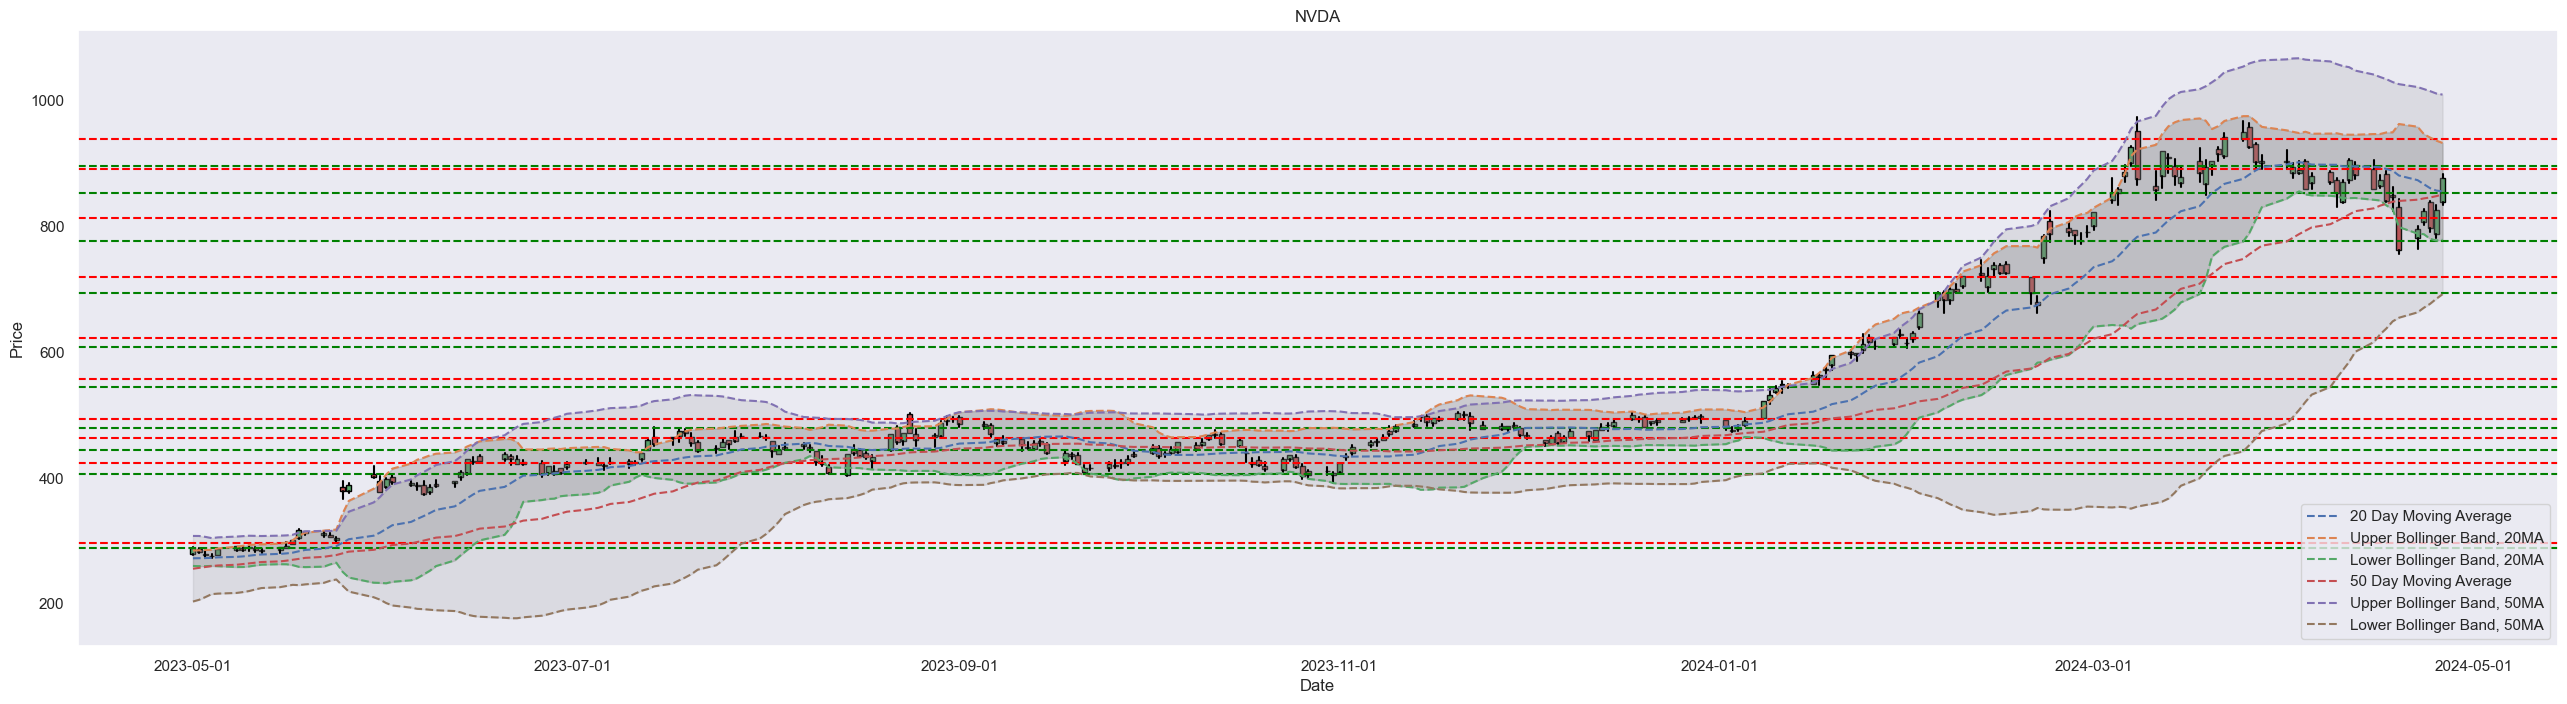

In [8]:
stock_strategy('nvda', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('nvda').latest_metric()
stock_strategy('nvda').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 37.58 ~ up 39.0 , down 34.48
Latest 20 Day MA: 36.82
Latest Lower Bollinger Band, 20MA: 29.66
Latest Higher Bollinger Band, 20MA: 43.99
Latest 50 Day MA: 37.31
Latest Lower Bollinger Band, 50MA: 24.48
Latest Higher Bollinger Band, 50MA: 50.14

Latest RSI: 48.72 
Latest MACD Divergence: -0.41 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 53.74
20MA break point: 36.78
20MA Lower Bollinger Band break point: 28.25
20MA Upper Bollinger Band break point: 45.32
50MA break point: 37.3
50MA Lower Bollinger Band break point: 23.26
50MA Upper Bollinger Band break point: 51.34
[[14.4341253 ]
 [16.64041668]
 [20.31798363]
 [24.88428552]
 [28.21814537]
 [31.43868756]
 [34.48444494]
 [37.64428575]
 [39.78999939]
 [42.89673309]]
[[14.81011908]
 [17.09785438]
 [21.13958359]
 [26.60385418]
 [30.05944475]
 [34.11813701]
 [38.99690018]
 [41.6387693 ]
 [43.8848609

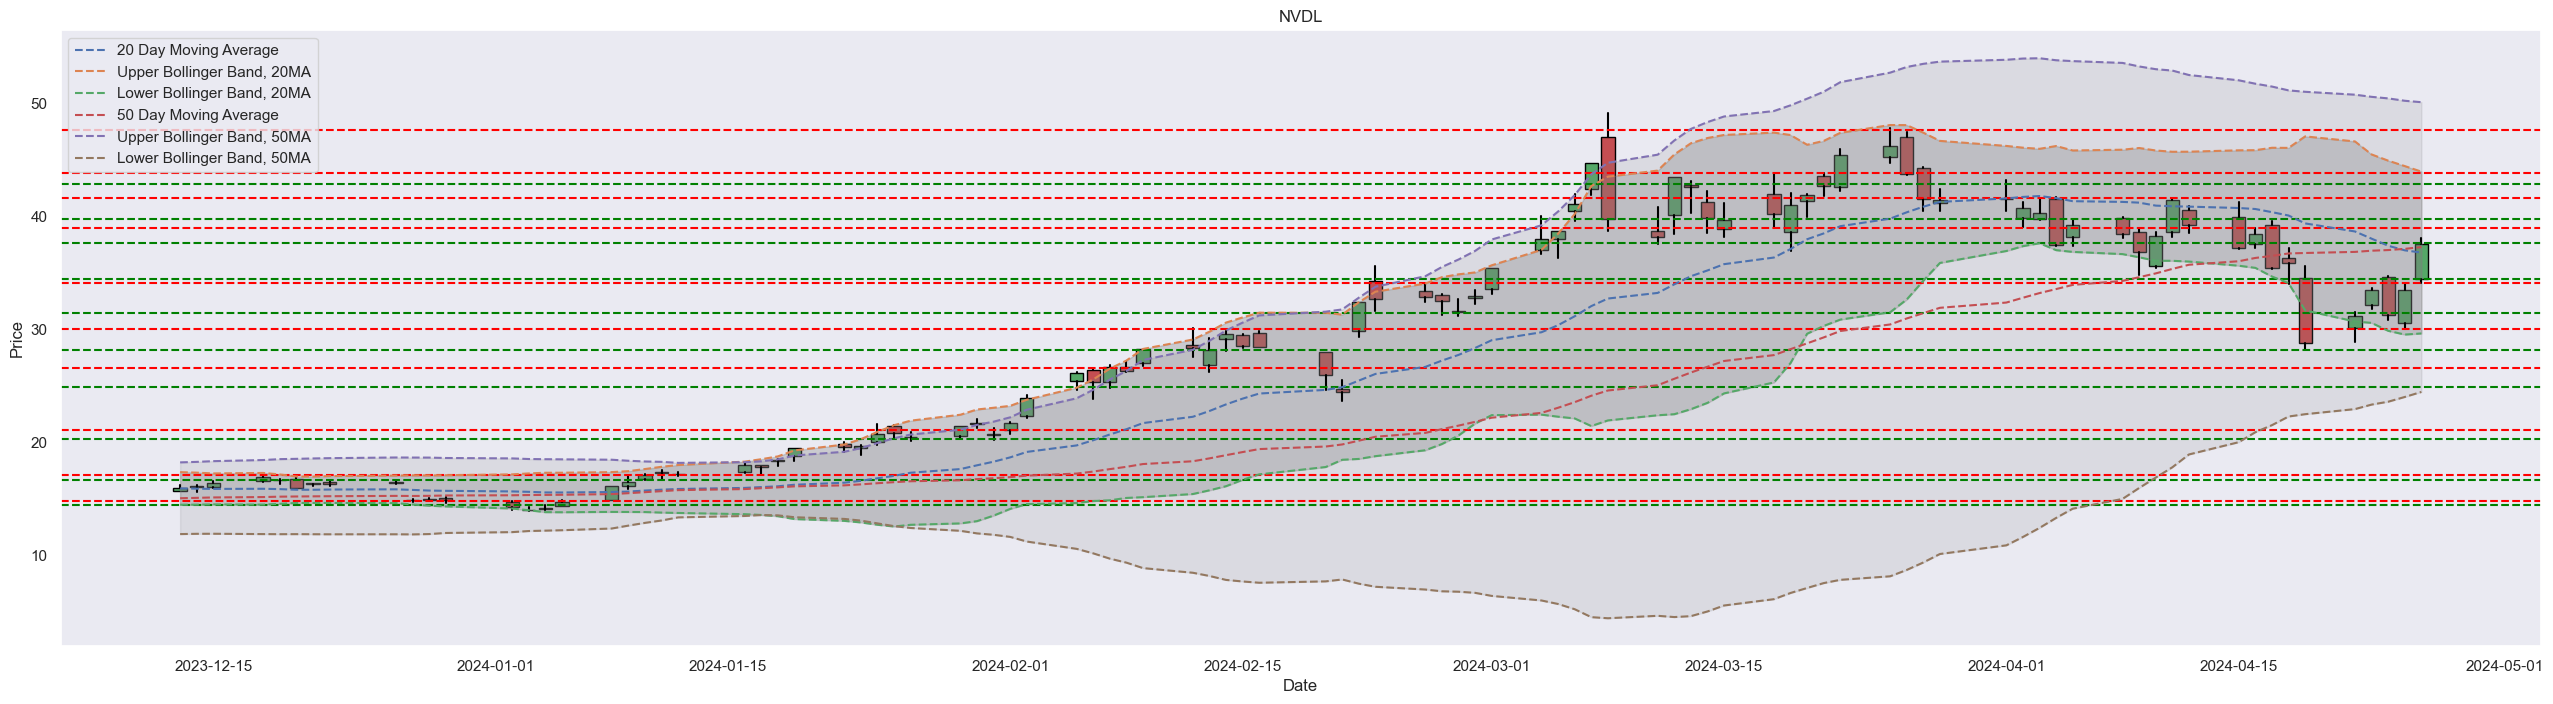

In [9]:
stock_strategy('nvdl', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('nvdl').latest_metric()
stock_strategy('nvdl').infer_metric()

Gld & UGL

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 216.62 ~ up 221.94 , down 216.18
Latest 20 Day MA: 216.27
Latest Lower Bollinger Band, 20MA: 208.97
Latest Higher Bollinger Band, 20MA: 223.58
Latest 50 Day MA: 204.16
Latest Lower Bollinger Band, 50MA: 175.7
Latest Higher Bollinger Band, 50MA: 232.61

Latest RSI: 50.27 
Latest MACD Divergence: -1.06 
[*********************100%%**********************]  1 of 1 completed
20MA break point: 216.26
20MA Lower Bollinger Band break point: 207.54
20MA Upper Bollinger Band break point: 224.97
50MA break point: 203.9
50MA Lower Bollinger Band break point: 173.16
50MA Upper Bollinger Band break point: 234.65
[[170.01333449]
 [175.52882385]
 [178.18149986]
 [181.17622274]
 [183.80774221]
 [187.28640137]
 [189.90764842]
 [199.83117766]
 [209.63800049]
 [216.18266602]]
[[171.94272822]
 [178.4880395 ]
 [181.95526244]
 [184.59111065]
 [188.23408228]
 [191.0030438 ]
 [201.08388943]
 [209.65999985]
 [216.

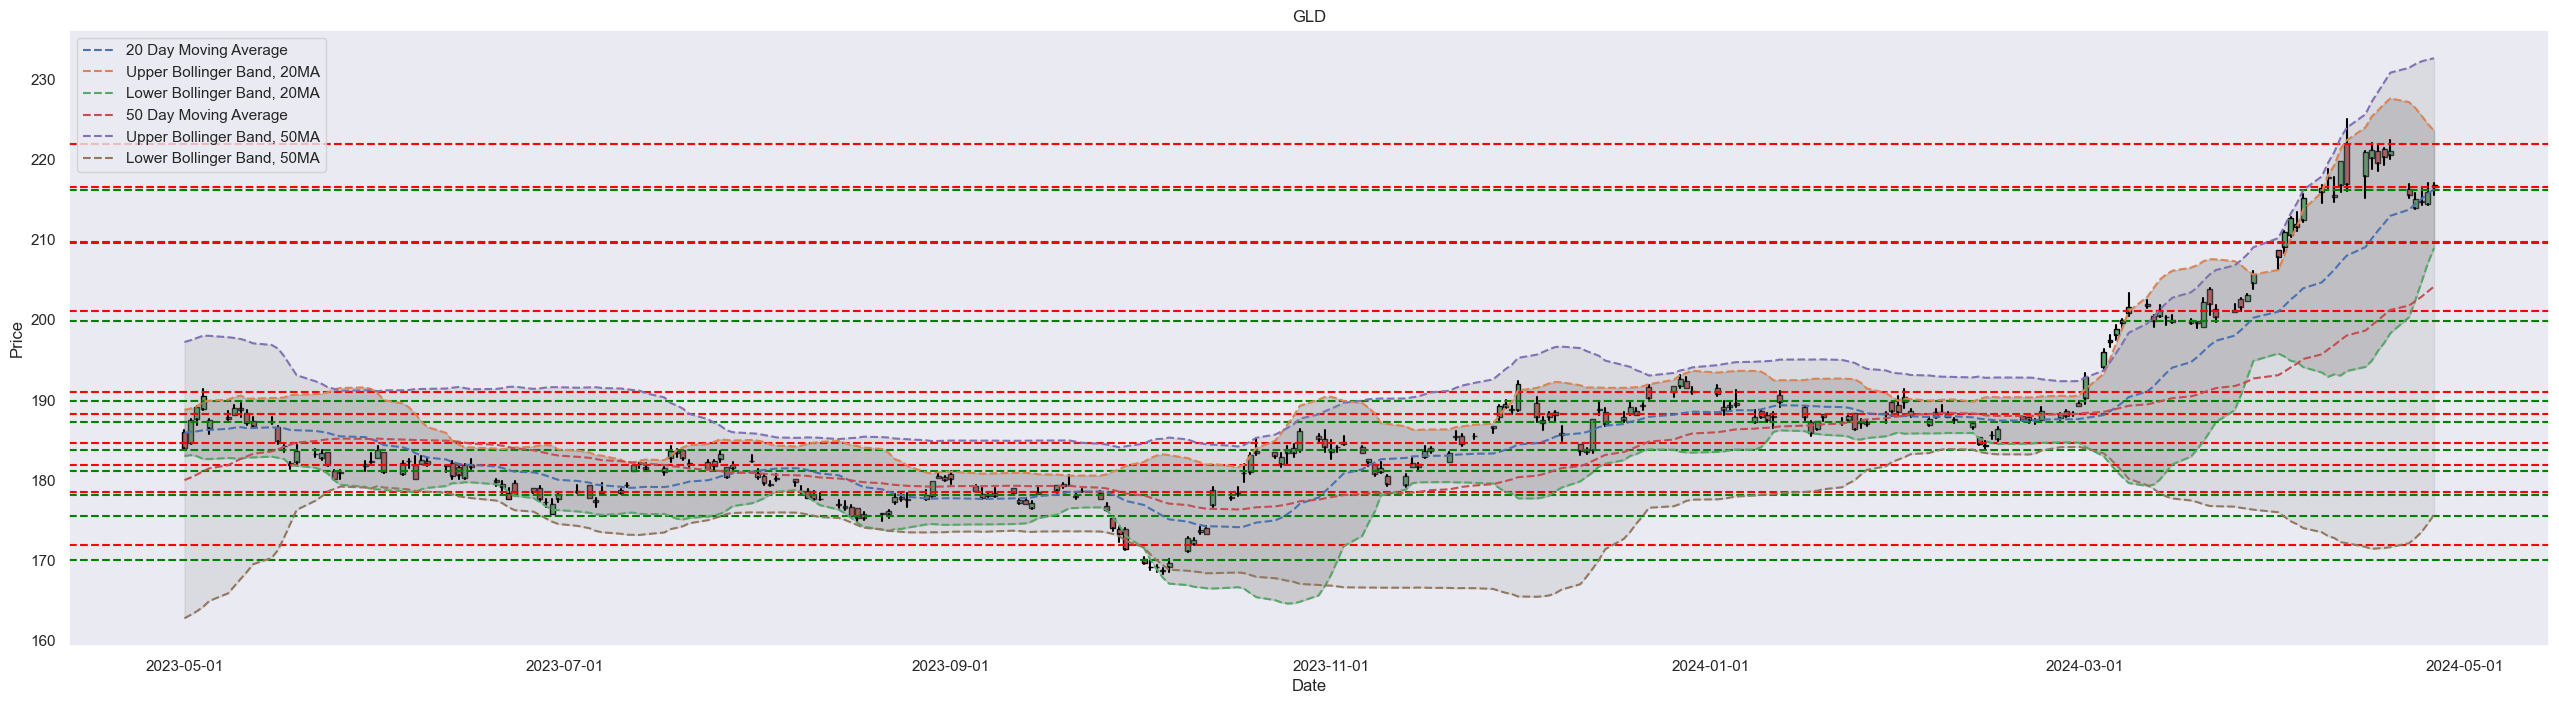

In [10]:
stock_strategy('gld', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('gld').latest_metric()
stock_strategy('gld').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 79.46 ~ up 79.99 , down 78.49
Latest 20 Day MA: 79.57
Latest Lower Bollinger Band, 20MA: 74.39
Latest Higher Bollinger Band, 20MA: 84.76
Latest 50 Day MA: 71.47
Latest Lower Bollinger Band, 50MA: 52.54
Latest Higher Bollinger Band, 50MA: 90.4

Latest RSI: 49.02 
Latest MACD Divergence: -0.76 
[*********************100%%**********************]  1 of 1 completed
20MA break point: 79.58
20MA Lower Bollinger Band break point: 73.39
20MA Upper Bollinger Band break point: 85.76
50MA break point: 71.31
50MA Lower Bollinger Band break point: 50.84
50MA Upper Bollinger Band break point: 91.78
[[52.23416646]
 [56.62666681]
 [58.46999998]
 [60.46453328]
 [62.30066655]
 [65.10692244]
 [68.66529442]
 [74.57500076]
 [78.49416669]
 [81.66249847]]
[[52.86636422]
 [57.42583317]
 [59.29555554]
 [61.14062482]
 [62.81741961]
 [65.5889475 ]
 [69.69777764]
 [76.33500099]
 [79.98111047]
 [83.7157135 ]]
[******

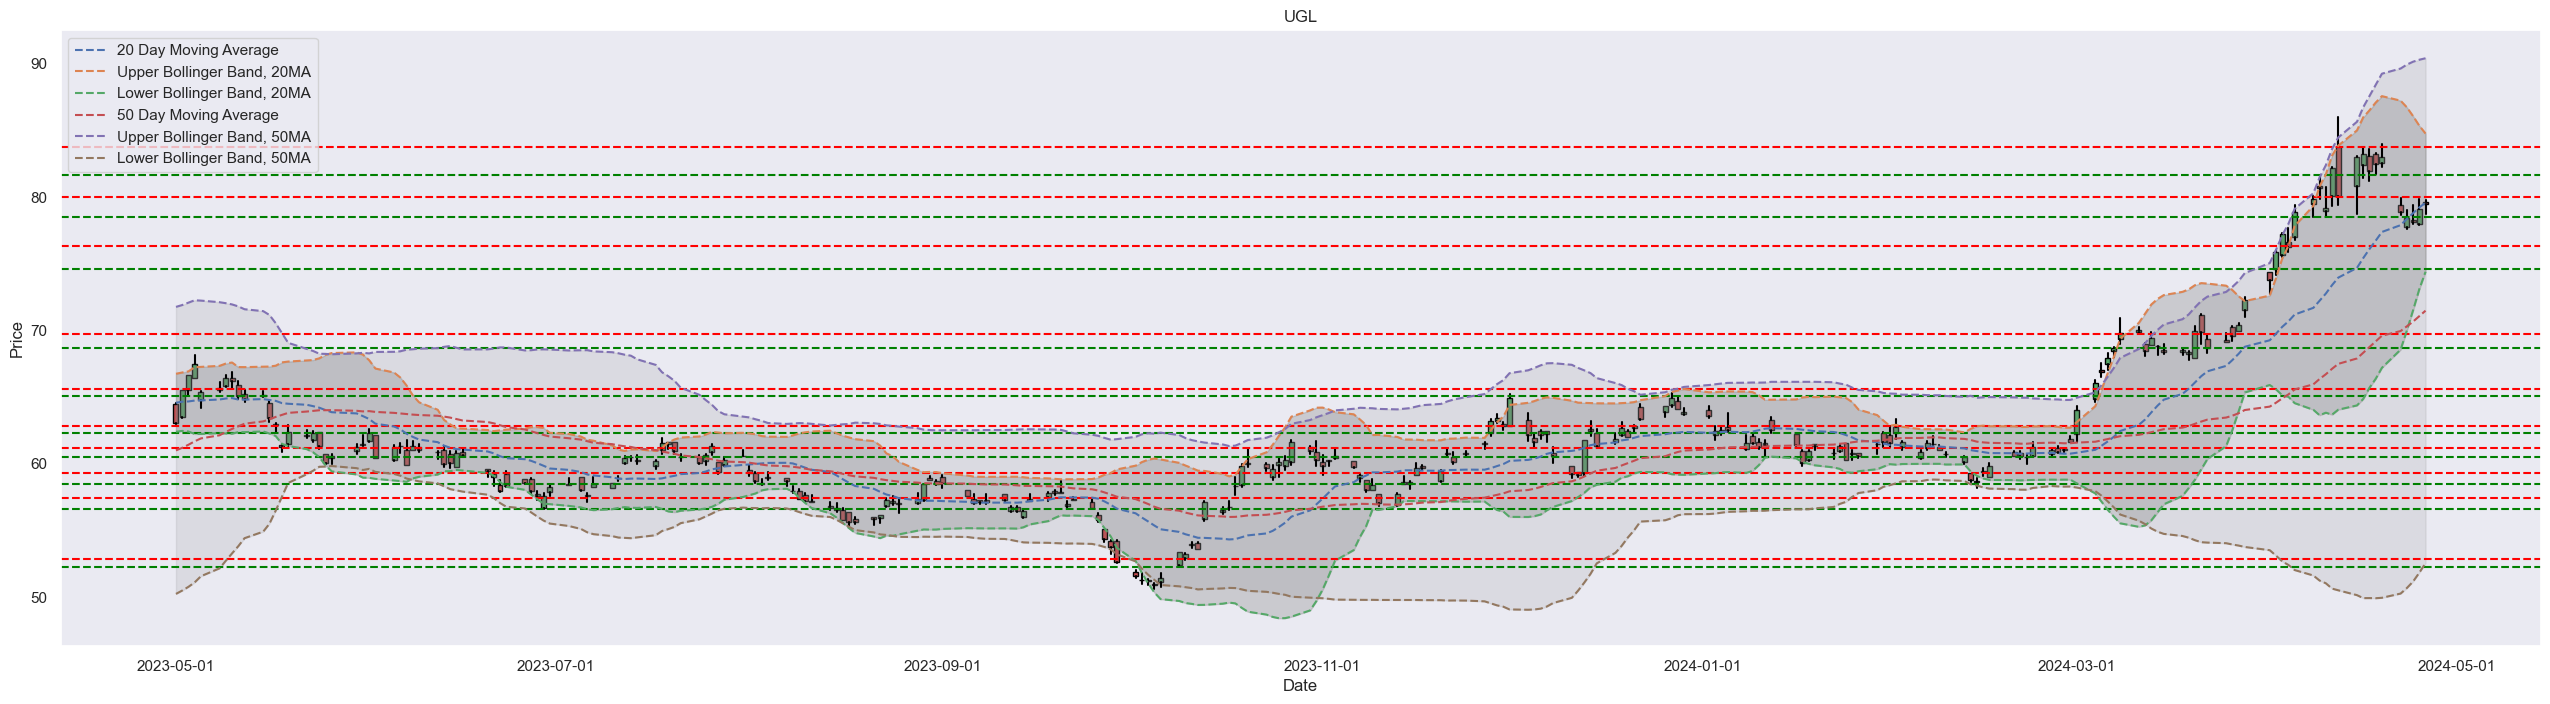

In [11]:
stock_strategy('ugl', start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d')).output(strategy='daily')
stock_strategy('ugl').latest_metric()
stock_strategy('ugl').infer_metric()

Random stocks

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 168.29 ~ up 173.8 , down 165.45
Latest 20 Day MA: 163.59
Latest Lower Bollinger Band, 20MA: 142.09
Latest Higher Bollinger Band, 20MA: 185.1
Latest 50 Day MA: 175.53
Latest Lower Bollinger Band, 50MA: 137.0
Latest Higher Bollinger Band, 50MA: 214.06

Latest RSI: 46.85 
Latest MACD Divergence: 1.33 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 566.18
20MA break point: 163.35
20MA Lower Bollinger Band break point: 137.83
20MA Upper Bollinger Band break point: 188.86
50MA break point: 175.68
50MA Lower Bollinger Band break point: 133.62
50MA Upper Bollinger Band break point: 217.74
[[116.1836837 ]
 [146.33722263]
 [165.45631462]
 [180.71030287]
 [194.88462943]
 [213.51333318]
 [233.63022791]
 [248.94053097]
 [268.50444404]
 [292.34658109]]
[[124.19157771]
 [155.67130379]
 [173.79823543]
 [187.45982441]
 [201.48438678]
 [222.20562894]
 [241.296923

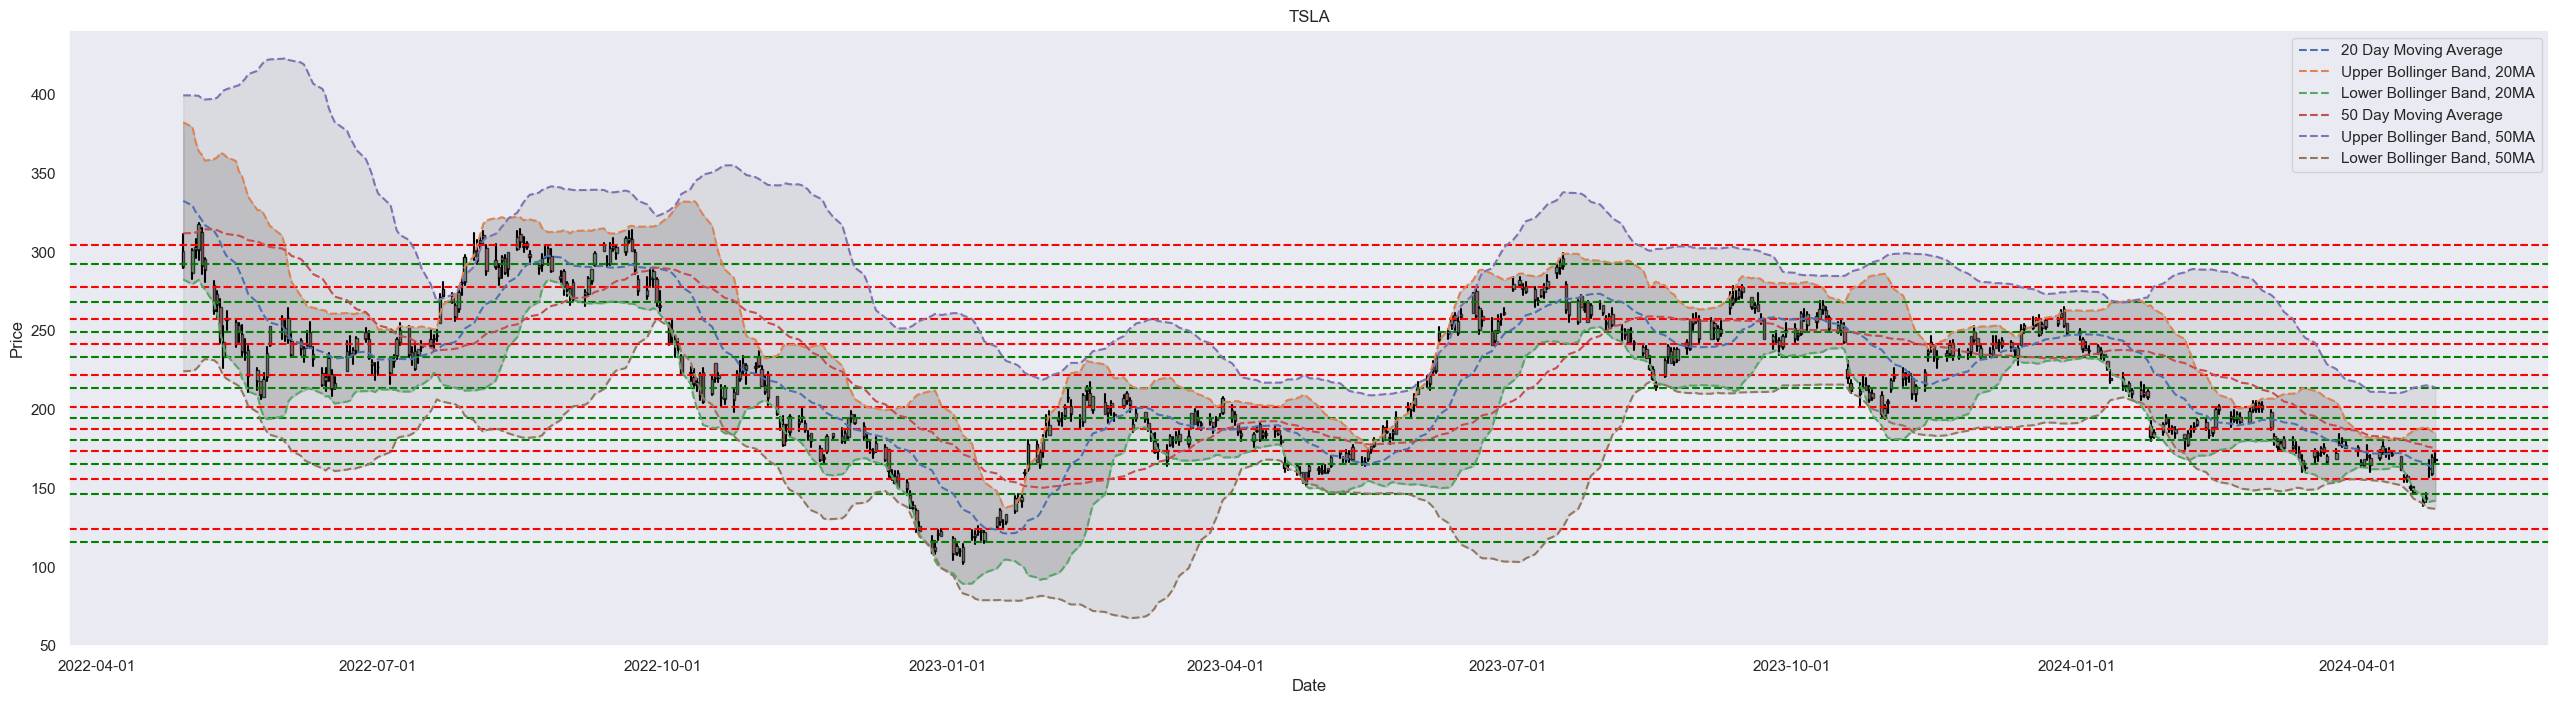

In [12]:
stock_strategy('tsla').output(strategy='daily')
stock_strategy('tsla').latest_metric()
stock_strategy('tsla').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 95.74 ~ up 97.0 , down 92.12
Latest 20 Day MA: 96.16
Latest Lower Bollinger Band, 20MA: 93.62
Latest Higher Bollinger Band, 20MA: 98.7
Latest 50 Day MA: 91.81
Latest Lower Bollinger Band, 50MA: 80.96
Latest Higher Bollinger Band, 50MA: 102.66

Latest RSI: 39.2 
Latest MACD Divergence: -0.3 
[*********************100%%**********************]  1 of 1 completed
20MA break point: 96.18
20MA Lower Bollinger Band break point: 93.16
20MA Upper Bollinger Band break point: 99.21
50MA break point: 91.73
50MA Lower Bollinger Band break point: 79.97
50MA Upper Bollinger Band break point: 103.5
[[69.59760071]
 [73.87649956]
 [77.15588214]
 [79.99183107]
 [82.80527761]
 [84.81837224]
 [87.34552604]
 [89.75149975]
 [92.12657187]
 [95.91714314]]
[[70.54999953]
 [73.90636409]
 [77.96054057]
 [80.29439972]
 [82.62100016]
 [84.97103443]
 [87.1711628 ]
 [89.85830712]
 [92.69803592]
 [96.99500063]]
[********

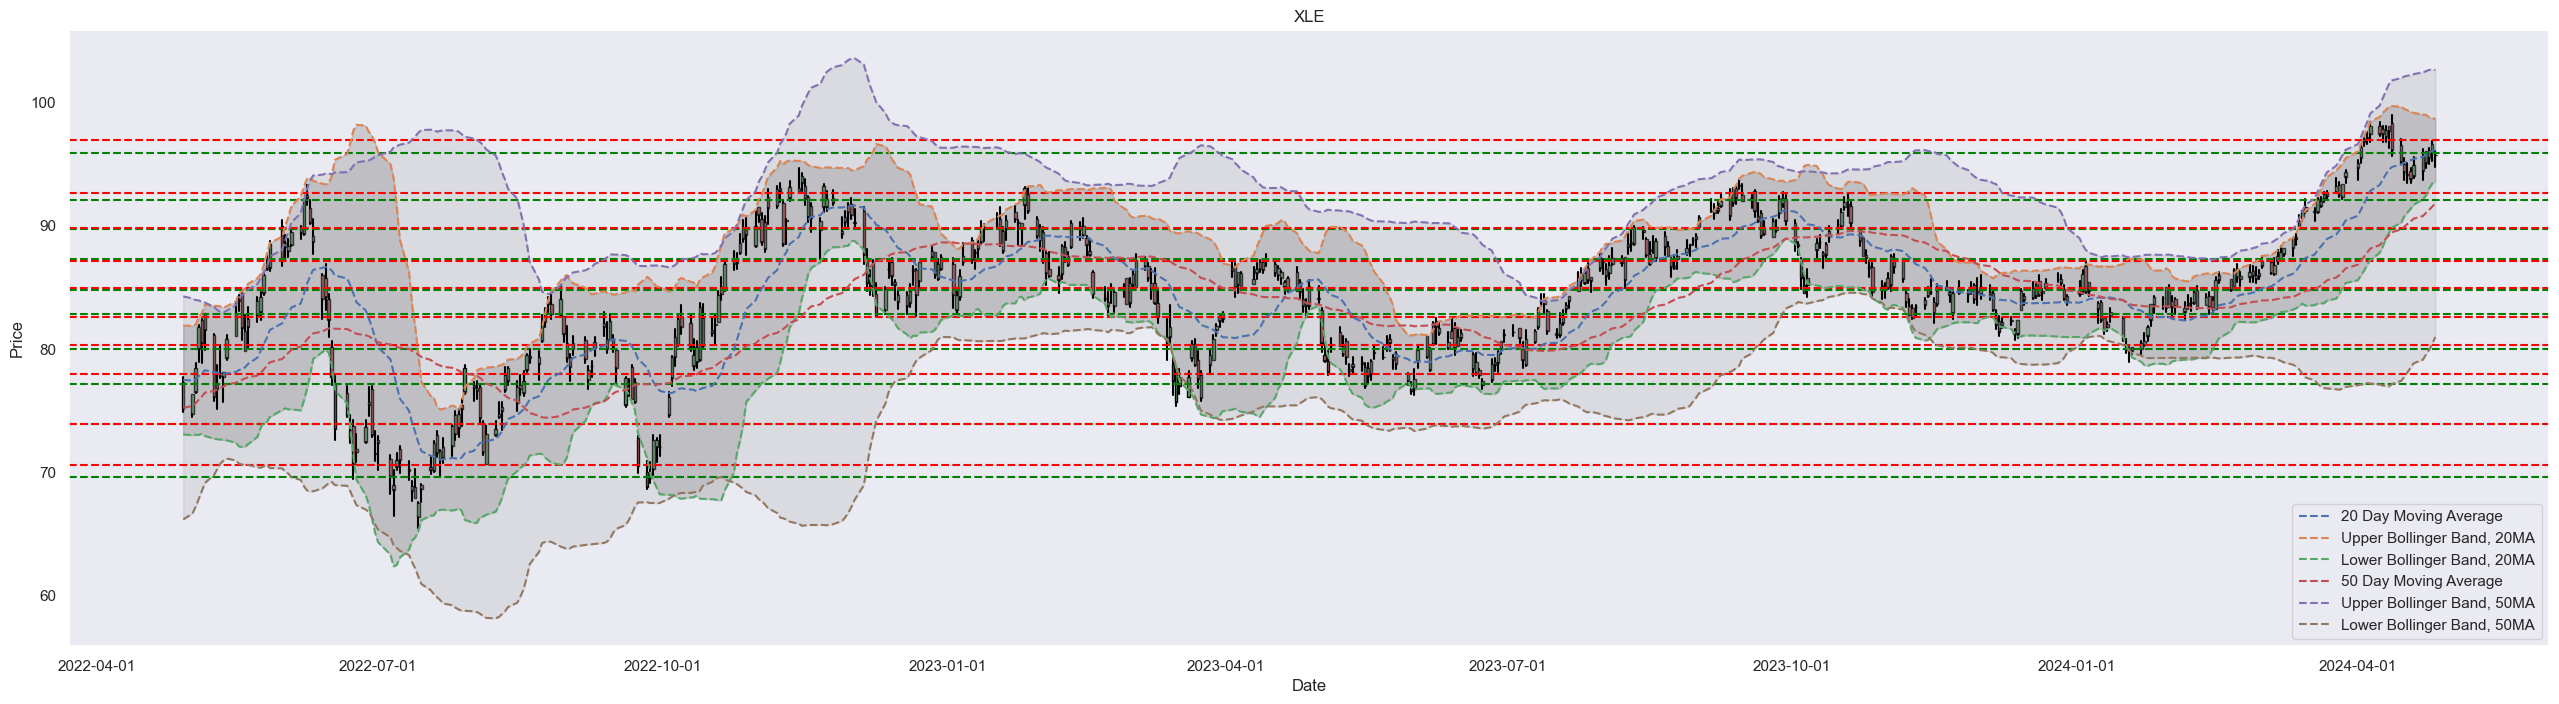

In [13]:
stock_strategy('xle').output(strategy='daily')
stock_strategy('xle').latest_metric()
stock_strategy('xle').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 48.6 ~ up 49.4 , down 47.25
Latest 20 Day MA: 49.29
Latest Lower Bollinger Band, 20MA: 44.98
Latest Higher Bollinger Band, 20MA: 53.61
Latest 50 Day MA: 43.52
Latest Lower Bollinger Band, 50MA: 28.9
Latest Higher Bollinger Band, 50MA: 58.14

Latest RSI: 37.93 
Latest MACD Divergence: -0.43 
[*********************100%%**********************]  1 of 1 completed
20MA break point: 49.33
20MA Lower Bollinger Band break point: 44.19
20MA Upper Bollinger Band break point: 54.46
50MA break point: 43.42
50MA Lower Bollinger Band break point: 27.55
50MA Upper Bollinger Band break point: 59.28
[[31.44864528]
 [34.76481836]
 [37.71067642]
 [41.42719042]
 [44.24663248]
 [47.25544122]
 [50.11671997]
 [53.88727257]
 [59.11500029]
 [64.95885849]]
[[33.15642864]
 [36.16845768]
 [38.86223673]
 [43.02227072]
 [45.80613037]
 [49.39581828]
 [52.87585153]
 [57.01444456]
 [62.79399986]
 [68.359375  ]]
[********

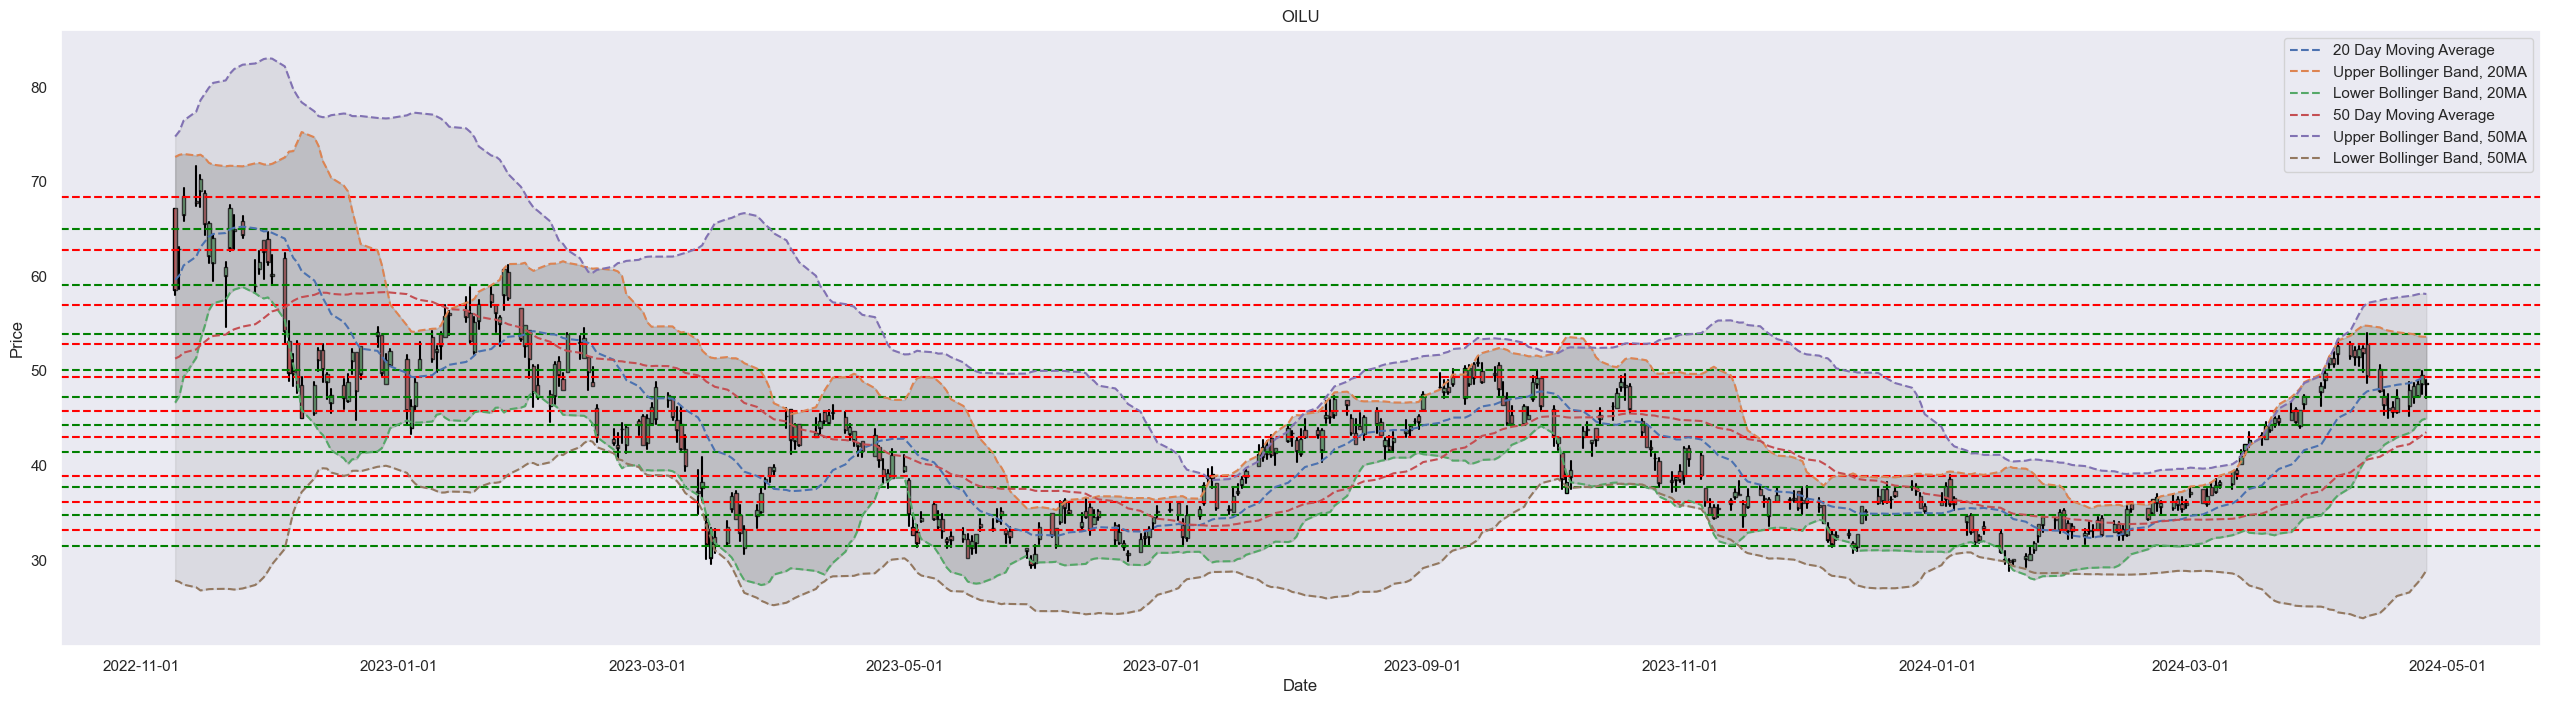

In [14]:
stock_strategy('oilu').output(strategy='daily')
stock_strategy('oilu').latest_metric()
stock_strategy('oilu').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 23.21 ~ up 26.99 , down 18.2
Latest 20 Day MA: 19.85
Latest Lower Bollinger Band, 20MA: 17.16
Latest Higher Bollinger Band, 20MA: 22.54
Latest 50 Day MA: 19.16
Latest Lower Bollinger Band, 50MA: 16.0
Latest Higher Bollinger Band, 50MA: 22.32

Latest RSI: 68.12 
Latest MACD Divergence: 0.39 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 0.19
20MA break point: 19.67
20MA Lower Bollinger Band break point: 17.07
20MA Upper Bollinger Band break point: 22.27
50MA break point: 19.08
50MA Lower Bollinger Band break point: 16.01
50MA Upper Bollinger Band break point: 22.14
[[18.20399994]
 [26.33530302]
 [32.93044116]
 [38.85454548]
 [45.19387091]
 [54.69124985]
 [62.40083302]
 [69.32272755]
 [79.50956593]
 [92.95999951]]
[[18.84161632]
 [26.98      ]
 [33.88382373]
 [40.50462683]
 [47.24116669]
 [55.24300003]
 [63.85363665]
 [70.48071453]
 [83.23142896]

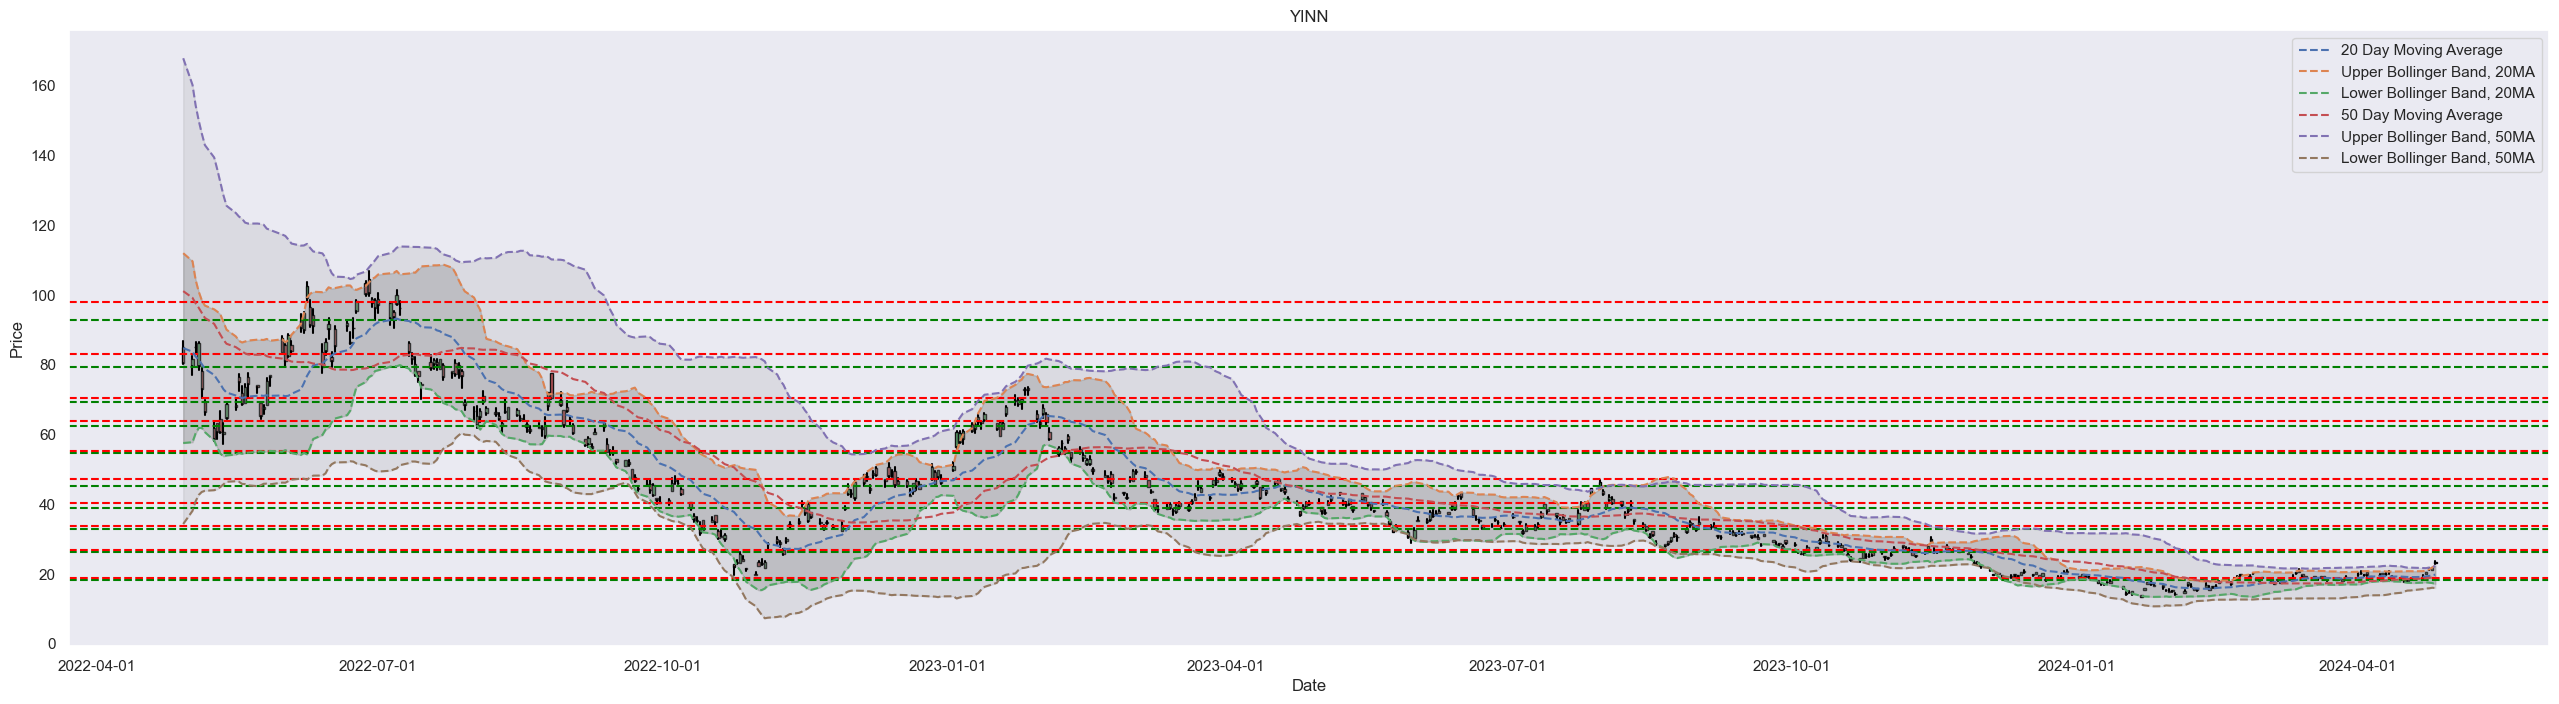

In [15]:
stock_strategy('yinn').output(strategy='daily')
stock_strategy('yinn').latest_metric()
stock_strategy('yinn').infer_metric()

[*********************100%%**********************]  1 of 1 completed
* previous stock price closing 55.75 ~ up 56.11 , down 54.66
Latest 20 Day MA: 58.0
Latest Lower Bollinger Band, 20MA: 52.84
Latest Higher Bollinger Band, 20MA: 63.16
Latest 50 Day MA: 56.5
Latest Lower Bollinger Band, 50MA: 43.15
Latest Higher Bollinger Band, 50MA: 69.84

Latest RSI: 33.24 
Latest MACD Divergence: -0.46 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 5.72
20MA break point: 58.12
20MA Lower Bollinger Band break point: 52.09
20MA Upper Bollinger Band break point: 64.14
50MA break point: 56.51
50MA Lower Bollinger Band break point: 41.91
50MA Upper Bollinger Band break point: 71.11
[[34.9034293 ]
 [37.44166629]
 [41.44250011]
 [44.76125002]
 [49.27999878]
 [52.21500015]
 [54.66954526]
 [57.25388845]
 [59.12875017]
 [61.79833285]]
[[35.18875027]
 [38.0296432 ]
 [42.14333344]
 [45.44249964]
 [49.77666728]
 [56.10349922]
 [58.19875002]
 [59.78928593]
 [61.7170002 

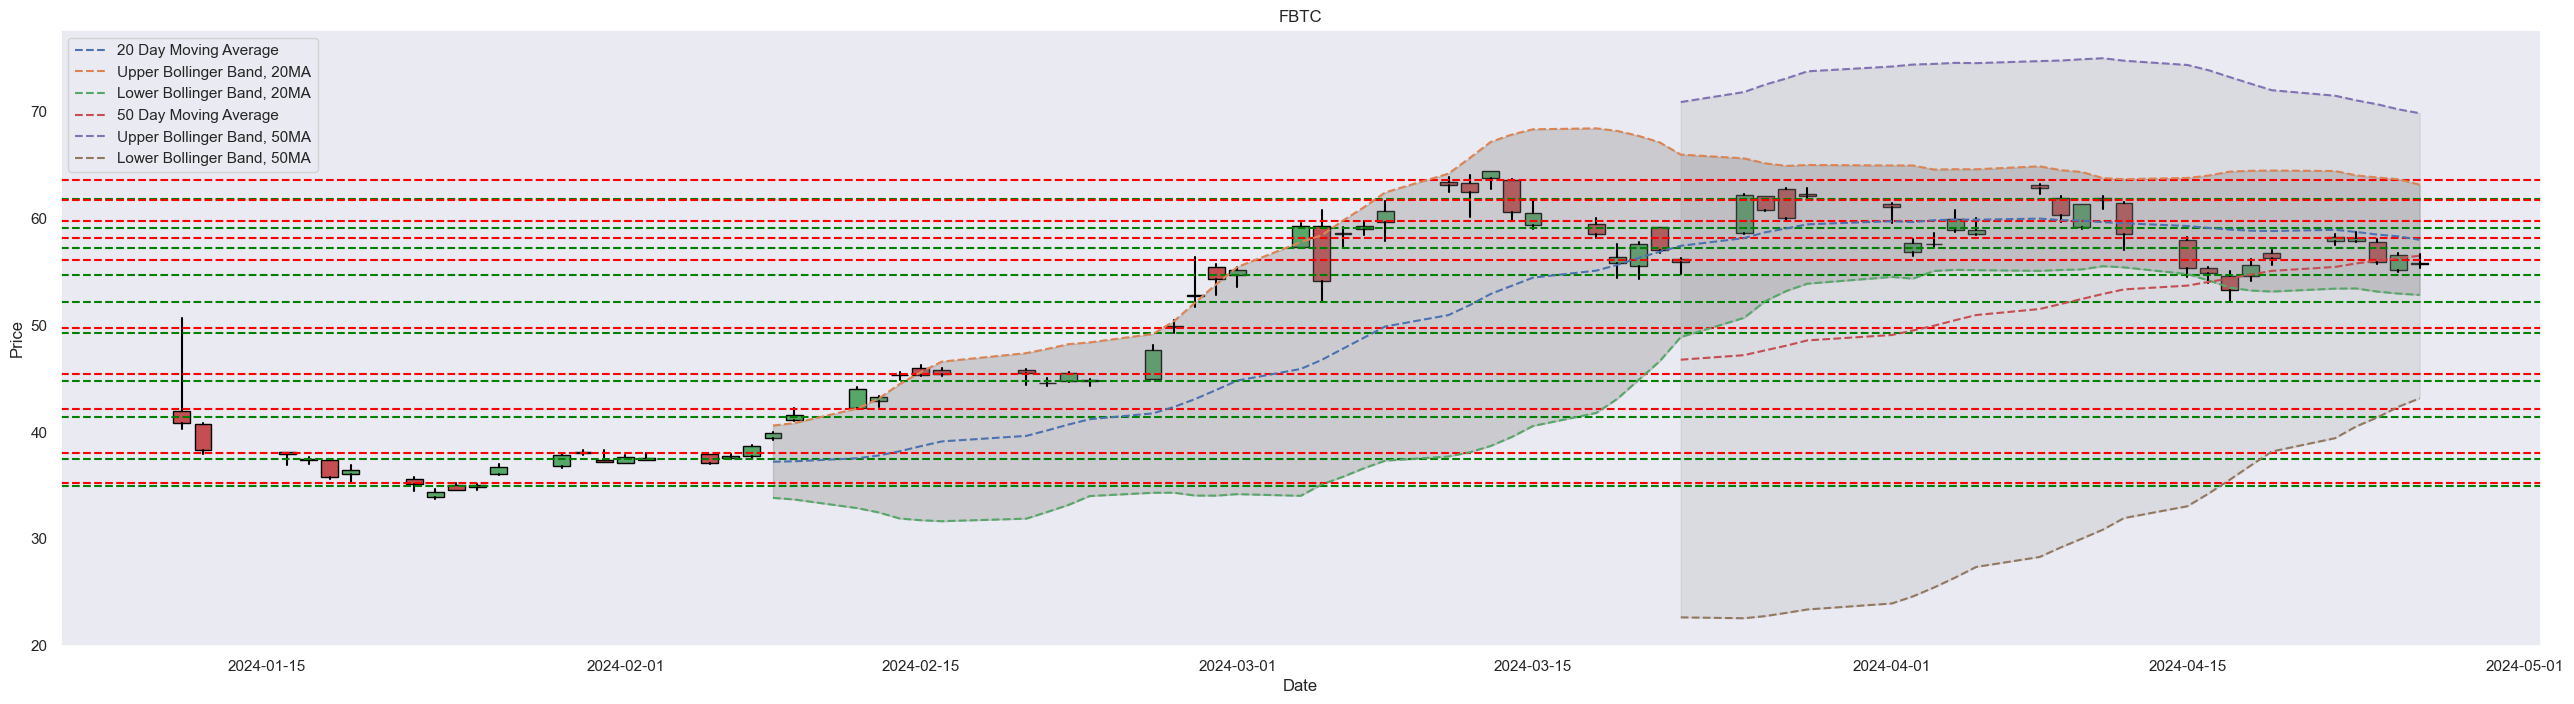

In [16]:
stock_strategy('fbtc').output(strategy='daily')
stock_strategy('fbtc').latest_metric()
stock_strategy('fbtc').infer_metric()
# stock_strategy('fbtc').latest_metric(realtime=False, imputed_value=67)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2024-04-29
* previous stock price closing 55.15 ~ up 57.24 , down 55.09
Latest 20 Day MA: 56.99
Latest Lower Bollinger Band, 20MA: 52.72
Latest Higher Bollinger Band, 20MA: 61.25
Latest 50 Day MA: 58.72
Latest Lower Bollinger Band, 50MA: 52.09
Latest Higher Bollinger Band, 50MA: 65.34

Latest RSI: 41.29 
Latest MACD Divergence: -0.16 
[*********************100%%**********************]  1 of 1 completed
20MA crosses 50MA at 5.72
20MA break point: 58.12
20MA Lower Bollinger Band break point: 52.09
20MA Upper Bollinger Band break point: 64.14
50MA break point: 56.51
50MA Lower Bollinger Band break point: 41.91
50MA Upper Bollinger Band break point: 71.11
[[14.63868666]
 [17.38423154]
 [20.07526183]
 [23.38581359]
 [25.86911049]
 [31.6814998 ]
 [37.2387837 ]
 [44.54345853]
 [55.09189573]
 [60.01446123]]
[[15.71004711]
 [18.66355068]
 [21.33620709]
 [24.4

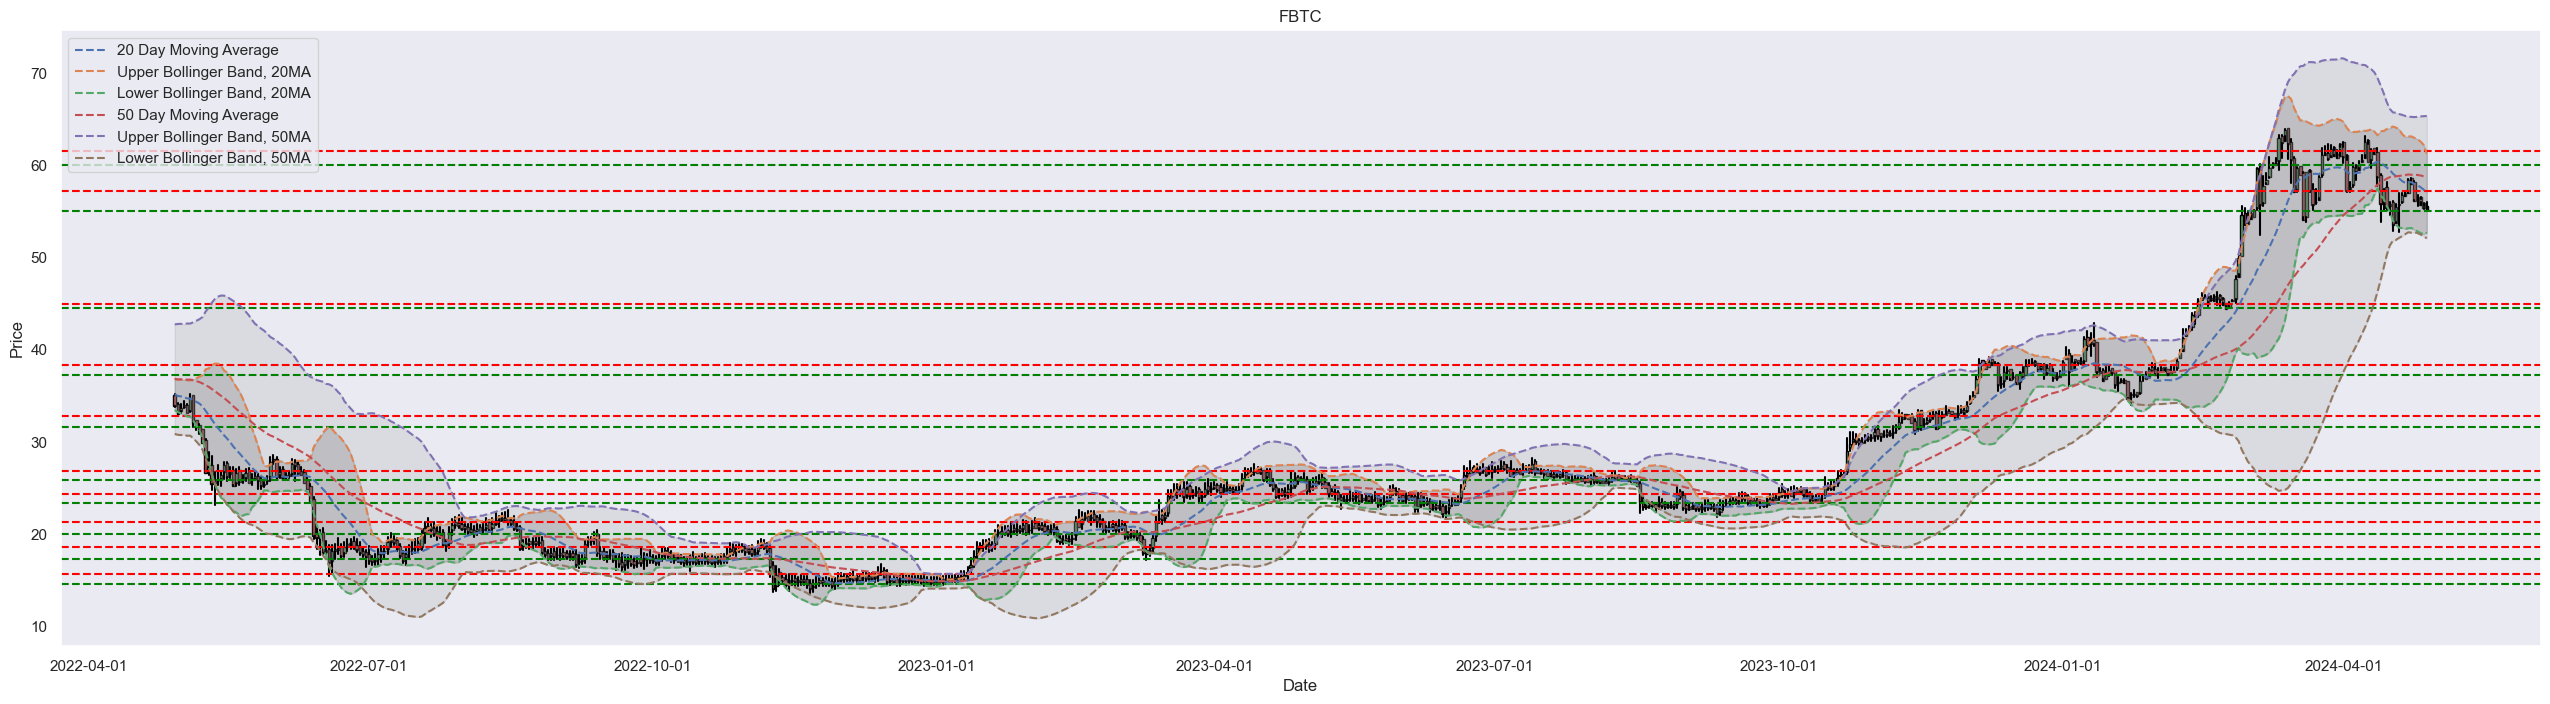

In [17]:
stock_strategy('fbtc', impute=True).output(strategy='daily')

### Backup only

In [18]:
# def get_optimum_clusters(df, saturation_point=0.05):
#     '''

#     :param df: dataframe
#     :param saturation_point: The amount of difference we are willing to detect
#     :return: clusters with optimum K centers

#     This method uses elbow method to find the optimum number of K clusters
#     We initialize different K-means with 1..10 centers and compare the inertias
#     If the difference is no more than saturation_point, we choose that as K and move on
#     '''

#     wcss = []
#     k_models = []

#     size = min(11, len(df.index))
#     for i in range(1, size):
#         kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#         kmeans.fit(df)
#         wcss.append(kmeans.inertia_)
#         k_models.append(kmeans)

#     # Compare differences in inertias until it's no more than saturation_point
#     optimum_k = len(wcss)-1
#     for i in range(0, len(wcss)-1):
#         diff = abs(wcss[i+1] - wcss[i])
#         if diff < saturation_point:
#             optimum_k = i
#             break

#     # knee = KneeLocator(range(1, size), wcss, curve='convex', direction='decreasing')
#     # optimum_k = knee.knee

#     # print("Optimum K is " + str(optimum_k + 1))
#     optimum_clusters = k_models[optimum_k]

#     return optimum_clusters

In [19]:
# def break_point_solution(stock_name):
#     '''
#     Solve for the break point solution price for breaking the current MA/BB
#     stock_name: str
#     '''
#     df = yf.download(stock_name.upper(),
#                  start=(datetime.today() - relativedelta(days=100)).strftime('%Y-%m-%d'),
#                  end=datetime.today()
#                  )
#     df = df.reset_index()
#     df.columns = df.columns.str.lower()
#     # df = df[['close']]
    
#     # Define the expression whose roots we want to find
#     # fsolve is not satisfying; provide analytical solution
    
#     # last_19day_price = df['close'][-20:-1]
#     # last_49day_price = df['close'][-50:-1]
#     last_19day_price = df[df['date'].between(
#         (datetime.today()-relativedelta(days=19)).strftime('%Y-%m-%d'),
#         (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d'))]['close']
#     last_49day_price = df[df['date'].between(
#         (datetime.today()-relativedelta(days=49)).strftime('%Y-%m-%d'),
#         (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d'))]['close']
    
#     # func_20MA = lambda price : (np.sum(last_19day_price) + price)/20 - price
#     # func_50MA = lambda price : (np.sum(last_49day_price) + price)/50 - price
#     # func_20MA_UBB = lambda price : (np.sum(last_19day_price) + price)/20 + 2*np.sqrt((np.sum(last_19day_price**2) + price**2 - (np.sum(last_19day_price) + price)**2/20)/19) - price
#     # func_20MA_LBB = lambda price : (np.sum(last_19day_price) + price)/20 - 2*np.sqrt((np.sum(last_19day_price**2) + price**2 - (np.sum(last_19day_price) + price)**2/20)/19) - price
#     # func_50MA_UBB = lambda price : (np.sum(last_49day_price) + price)/50 + 2.5*np.sqrt((np.sum(last_49day_price**2) + price**2 - (np.sum(last_49day_price) + price)**2/50)/49) - price
#     # func_50MA_LBB = lambda price : (np.sum(last_49day_price) + price)/50 - 2.5*np.sqrt((np.sum(last_49day_price**2) + price**2 - (np.sum(last_49day_price) + price)**2/50)/49) - price

#     # func_20MA = lambda price : np.mean(np.append(last_19day_price, price)) - price
#     # func_50MA = lambda price : np.mean(np.append(last_49day_price, price)) - price
#     # func_20MA_UBB = lambda price : np.mean(np.append(last_19day_price, price)) + 2 * np.std(np.append(last_19day_price, price), ddof=1) - price
#     # func_20MA_LBB = lambda price : np.mean(np.append(last_19day_price, price)) - 2 * np.std(np.append(last_19day_price, price), ddof=1) - price
#     # func_50MA_UBB = lambda price : np.mean(np.append(last_49day_price, price)) + 2.5 * np.std(np.append(last_49day_price, price), ddof=1) - price
#     # func_50MA_LBB = lambda price : np.mean(np.append(last_49day_price, price)) - 2.5 * np.std(np.append(last_49day_price, price), ddof=1) - price

#     # price_initial_guess = df['close'].tolist()[-1]
#     # price_solution = fsolve(func_20MA, price_initial_guess)
#     # price_solution = fsolve(func_50MA, price_initial_guess)
#     # price_solution = fsolve(func_20MA_UBB, price_initial_guess)
#     # price_solution = fsolve(func_20MA_LBB, price_initial_guess)
#     # price_solution = fsolve(func_50MA_UBB, price_initial_guess)
#     # price_solution = fsolve(func_50MA_LBB, price_initial_guess)

#     a1 = np.sum(last_19day_price)
#     a2 = np.sum(last_19day_price**2)
#     p_ma = np.mean(last_19day_price)
#     p_ubb = (562*a1 + np.sqrt((562*a1)**2 - 4*(5339*(99*a1**2-1600*a2))))/5339/2
#     p_lbb = (562*a1 - np.sqrt((562*a1)**2 - 4*(5339*(99*a1**2-1600*a2))))/5339/2
    
#     print('20MA break point:', round(p_ma,2))
#     print('20MA Lower Bollinger Band break point:', round(p_lbb,2))
#     print('20MA Upper Bollinger Band break point:', round(p_ubb,2))

#     a1 = np.sum(last_49day_price)
#     a2 = np.sum(last_49day_price**2)
#     p_ma = np.mean(last_49day_price)
#     p_ubb = (4177*a1 + np.sqrt((4177*a1)**2 - 4*(102336.5*(361.5*a1**2-15625*a2))))/102336.5/2
#     p_lbb = (4177*a1 - np.sqrt((4177*a1)**2 - 4*(102336.5*(361.5*a1**2-15625*a2))))/102336.5/2
    
#     print('50MA break point:', round(p_ma,2))
#     print('50MA Lower Bollinger Band break point:', round(p_lbb,2))
#     print('50MA Upper Bollinger Band break point:', round(p_ubb,2))

In [20]:
# from dateutil.relativedelta import relativedelta

# def test_option_trading(stock_name,
#                         start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d'),
#                         end=datetime.today().strftime('%Y-%m-%d'),
#                         return_result=False,
#                        ):

#     # Step 0: download the stock
#     df = yf.download(stock_name.upper(), start=start, end=end)
#     df = df.reset_index()
#     df.columns = df.columns.str.lower()

#     print(datetime.today().strftime('%Y-%m-%d'))

#     # Step 1: Moving average and Bollinger Band
    
#     df['20 Day MA'] = df['close'].rolling(window=20).mean()
#     df['20 Day STD'] = df['close'].rolling(window=20).std()
#     df['Upper Band - 20MA'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
#     df['Lower Band - 20MA'] = df['20 Day MA'] - (df['20 Day STD'] * 2)
#     df['50 Day MA'] = df['close'].rolling(window=50).mean()
#     df['50 Day STD'] = df['close'].rolling(window=50).std()
#     df['Upper Band - 50MA'] = df['50 Day MA'] + (df['50 Day STD'] * 2.5)
#     df['Lower Band - 50MA'] = df['50 Day MA'] - (df['50 Day STD'] * 2.5)
    
#     # Step 2: calculate RSI
#     # RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ] over a window
#     # default length of the window is most recent 14 trade days

#     delta = df['close'].diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
#     rs = gain / loss
#     df['RSI'] = 100 - (100 / (1 + rs))

#     # Step 3: Calculate MACD
#     df['12 Day EMA'] = df['close'].ewm(span=12, adjust=False).mean()
#     df['26 Day EMA'] = df['close'].ewm(span=26, adjust=False).mean()
#     # Calculate MACD line
#     df['MACD'] = df['12 Day EMA'] - df['26 Day EMA']
#     # Calculate signal line (9-period EMA of MACD line)
#     df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

#     # Step 4: Support and resistance calculation, using clustering
    
#     df_plot = df[df['date'] >= df['date'].min() + relativedelta(years=1)]

#     low_clusters = get_optimum_clusters(df_plot[(df_plot['low']!=df_plot['open'])&(df_plot['low']!=df_plot['close'])][['date',"low"]].set_index('date'))
#     # low_clusters = get_optimum_clusters(df_plot[['date',"low"]].set_index('date'))
#     low_centers = low_clusters.cluster_centers_
#     low_centers = np.sort(low_centers, axis=0)

#     high_clusters = get_optimum_clusters(df_plot[(df_plot['high']!=df_plot['open'])&(df_plot['high']!=df_plot['close'])][['date',"high"]].set_index('date'))
#     # high_clusters = get_optimum_clusters(df_plot[['date',"high"]].set_index('date'))
#     high_centers = high_clusters.cluster_centers_
#     high_centers = np.sort(high_centers, axis=0)

#     yesterday = (datetime.today() - relativedelta(days=1)).strftime('%Y-%m-%d')
#     close = df_plot[df_plot['date']==yesterday]['close'].item()
#     try: 
#         support = max([e[0] for e in low_centers if e < close])
#     except:
#         print('Break all support; record min stock price')
#         support = df_plot['low'].min()
#     try:
#         resistance = min([e[0] for e in high_centers if e > close])
#     except:
#         print('Break all resistance; record max stock price')
#         resistance = df_plot['high'].max()

#     # Finally, output and plot 
    
#     print('* previous stock price closing', round(close,2), '~ up', ceil(resistance*100)/100.0, ', down', floor(support*100)/100)
#     print("Latest 20 Day MA:", round(df_plot[df_plot['date']==yesterday]['20 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 20MA'].item(), 2))
#     print("Latest higher Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 20MA'].item(), 2))
#     print("Latest 50 Day MA:", round(df_plot[df_plot['date']==yesterday]['50 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 50MA'].item(), 2))
#     print("Latest higher Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 50MA'].item(), 2))
#     print()

#     latest_rsi = round(df_plot[df_plot['date']==yesterday]['RSI'].item(), 2)
#     if latest_rsi > 70:
#         print("Latest RSI:", Fore.RED + str(latest_rsi), Style.RESET_ALL)
#     elif latest_rsi < 30:
#         print("Latest RSI:", Fore.GREEN + str(latest_rsi), Style.RESET_ALL)
#     else:
#         print("Latest RSI:", latest_rsi, Style.RESET_ALL)
#     latest_macd = round(df[df['date']==yesterday]['MACD'].item() - df[df['date']==yesterday]['MACD_signal'].item(), 2)
#     if latest_macd < 0:
#         print("Latest MACD Divergence:", Fore.RED + str(latest_macd), Style.RESET_ALL)
#     elif latest_macd > 0:
#         print("Latest MACD Divergence:", Fore.GREEN + str(latest_macd), Style.RESET_ALL)
#     else:
#         print("Latest MACD Divergence:", Fore.BLACK + str(latest_macd), Style.RESET_ALL)
#     break_point_solution(stock_name)
    
#     print(low_centers)
#     print(high_centers)
    
#     ax = plot_candlestick(df_plot, figsize=(32,8))
#     ax.set_title(stock_name)
#     for low in low_centers[:]:
#         ax.axhline(low[0], color='green', ls='--')

#     for high in high_centers[:]:
#         ax.axhline(high[0], color='red', ls='--')
#     # df_plot['5_MA'] = df_plot['close'].rolling(window=5).mean()
#     # df_plot['9_MA'] = df_plot['close'].rolling(window=9).mean()
#     # df_plot['20_MA'] = df_plot['close'].rolling(window=20).mean()
#     # df_plot['50_MA'] = df_plot['close'].rolling(window=50).mean()

#     # ax.plot(df_plot['date'], df_plot['close'], color='black')
#     # ax.plot(df_plot['date'], df_plot['5_MA'], ls='--')

#     # ax.plot(df_plot['date'], df_plot['9_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['20_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['50_MA'], ls='--')
#     ax.plot(df_plot['date'], df_plot['20 Day MA'], ls='--', label='20 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 20MA'], ls='--', label='Upper Bollinger Band, 20MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 20MA'], ls='--', label='Lower Bollinger Band, 20MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 20MA'], df_plot['Lower Band - 20MA'], color='gray', alpha=0.3) # Fill the area between the bands
#     ax.plot(df_plot['date'], df_plot['50 Day MA'], ls='--', label='50 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 50MA'], ls='--', label='Upper Bollinger Band, 50MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 50MA'], ls='--', label='Lower Bollinger Band, 50MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 50MA'], df_plot['Lower Band - 50MA'], color='gray', alpha=0.15) # Fill the area between the bands

#     ax.legend()

#     if return_result:
#         return df_plot

In [21]:
# test_option_trading('qqq')

In [22]:
# def test_option_trading_fbtc(
#                         start=(datetime.today() - relativedelta(years=2)).strftime('%Y-%m-%d'),
#                         end=datetime.today().strftime('%Y-%m-%d')
#                        ):
#     df = yf.download('BTC-USD', start=start, end=end)
#     df = df.reset_index()
#     df.columns = df.columns.str.lower()

#     df_fbtc = yf.download('fbtc', start=start, end=end)
#     df_fbtc = df_fbtc.reset_index()
#     df_fbtc.columns = df_fbtc.columns.str.lower()

#     print(datetime.today().strftime('%Y-%m-%d'))

#     df_merged = pd.merge(df[['date','open','high', 'low','close']],
#                   df_fbtc[['date','open','high', 'low','close']],
#                   on='date')
#     s1 = df_merged['close_x']
#     s2 = df_merged['close_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['close'] = theta_best[0] + theta_best[1]*df['close']

#     s1 = df_merged['open_x']
#     s2 = df_merged['open_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['open'] = theta_best[0] + theta_best[1]*df['open']

#     s1 = df_merged['low_x']
#     s2 = df_merged['low_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['low'] = theta_best[0] + theta_best[1]*df['low']

#     s1 = df_merged['high_x']
#     s2 = df_merged['high_y']
#     X_b = np.c_[np.ones((len(s1), 1)), s1]  # Add a bias term (intercept) to feature matrix
#     theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(s2)
#     # print("Correlation and R2:", s1.corr(s2), r2_score(s2, intercept+slope*s1))
#     # print("Regression coeffs:", theta_best[0], theta_best[1])
#     df['high'] = theta_best[0] + theta_best[1]*df['high']

#     df['20 Day MA'] = df['close'].rolling(window=20).mean()
#     df['20 Day STD'] = df['close'].rolling(window=20).std()
#     df['50 Day MA'] = df['close'].rolling(window=50).mean()
#     df['50 Day STD'] = df['close'].rolling(window=50).std()    
#     # Calculate upper and Lower bands
#     df['Upper Band - 20MA'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
#     df['Lower Band - 20MA'] = df['20 Day MA'] - (df['20 Day STD'] * 2)
#     df['Upper Band - 50MA'] = df['50 Day MA'] + (df['50 Day STD'] * 2.5)
#     df['Lower Band - 50MA'] = df['50 Day MA'] - (df['50 Day STD'] * 2.5)

#     # Calculate RSI
#     delta = df['close'].diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
#     rs = gain / loss
#     df['RSI'] = 100 - (100 / (1 + rs))

#     # Calculate MACD
#     df['12 Day EMA'] = df['close'].ewm(span=12, adjust=False).mean()
#     df['26 Day EMA'] = df['close'].ewm(span=26, adjust=False).mean()
#     # Calculate MACD line
#     df['MACD'] = df['12 Day EMA'] - df['26 Day EMA']
#     # Calculate signal line (9-period EMA of MACD line)
#     df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

#     df_plot = df[df['date'] >= df['date'].min() + relativedelta(years=1)]

#     low_clusters = get_optimum_clusters(df_plot[(df_plot['low']!=df_plot['open'])&(df_plot['low']!=df_plot['close'])][['date',"low"]].set_index('date'))
#     # low_clusters = get_optimum_clusters(df_plot[['date',"low"]].set_index('date'))
#     low_centers = low_clusters.cluster_centers_
#     low_centers = np.sort(low_centers, axis=0)

#     high_clusters = get_optimum_clusters(df_plot[(df_plot['high']!=df_plot['open'])&(df_plot['high']!=df_plot['close'])][['date',"high"]].set_index('date'))
#     # high_clusters = get_optimum_clusters(df_plot[['date',"high"]].set_index('date'))
#     high_centers = high_clusters.cluster_centers_
#     high_centers = np.sort(high_centers, axis=0)

#     yesterday = (datetime.today() - relativedelta(days=1)).strftime('%Y-%m-%d')
#     close = df_plot[df_plot['date']==yesterday]['close'].item()
#     try: 
#         support = max([e[0] for e in low_centers if e < close])
#     except:
#         print('Break all support; record min stock price')
#         support = df_plot['low'].min()
#     try:
#         resistance = min([e[0] for e in high_centers if e > close])
#     except:
#         print('Break all resistance; record max stock price')
#         resistance = df_plot['high'].max()

#     print('* previous stock price closing', round(close,2), '~ up', ceil(resistance*100)/100.0, ', down', floor(support*100)/100)
#     print("Latest 20 Day MA:", round(df_plot[df_plot['date']==yesterday]['20 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 20MA'].item(), 2))
#     print("Latest higher Bollinger Band, 20MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 20MA'].item(), 2))
#     print("Latest 50 Day MA:", round(df_plot[df_plot['date']==yesterday]['50 Day MA'].item(), 2))
#     print("Latest Lower Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Lower Band - 50MA'].item(), 2))
#     print("Latest higher Bollinger Band, 50MA:", round(df_plot[df_plot['date']==yesterday]['Upper Band - 50MA'].item(), 2))
#     print()
    
#     latest_rsi = round(df_plot[df_plot['date']==yesterday]['RSI'].item(), 2)
#     if latest_rsi > 70:
#         print("Latest RSI:", Fore.RED + str(latest_rsi), Style.RESET_ALL)
#     elif latest_rsi < 30:
#         print("Latest RSI:", Fore.GREEN + str(latest_rsi), Style.RESET_ALL)
#     else:
#         print("Latest RSI:", latest_rsi, Style.RESET_ALL)
#     latest_macd = round(df_plot[df_plot['date']==yesterday]['MACD'].item() - df_plot[df_plot['date']==yesterday]['MACD_signal'].item(), 2)
#     if latest_macd < 0:
#         print("Latest MACD Divergence:", Fore.RED + str(latest_macd), Style.RESET_ALL)
#     elif latest_macd > 0:
#         print("Latest MACD Divergence:", Fore.GREEN + str(latest_macd), Style.RESET_ALL)
#     else:
#         print("Latest MACD Divergence:", Fore.BLACK + str(latest_macd), Style.RESET_ALL)
    
#     break_point_solution("fbtc")
    
#     print(low_centers)
#     print(high_centers)

#     ax = plot_candlestick(df_plot, figsize=(32,8))
#     ax.set_title('FBTC')
#     for low in low_centers[:]:
#         ax.axhline(low[0], color='green', ls='--')

#     for high in high_centers[:]:
#         ax.axhline(high[0], color='red', ls='--')
#     # df_plot['5_MA'] = df_plot['close'].rolling(window=5).mean()
#     # df_plot['9_MA'] = df_plot['close'].rolling(window=9).mean()
#     # df_plot['20_MA'] = df_plot['close'].rolling(window=20).mean()
#     # df_plot['50_MA'] = df_plot['close'].rolling(window=50).mean()

#     # ax.plot(df_plot['date'], df_plot['close'], color='black')
#     # ax.plot(df_plot['date'], df_plot['5_MA'], ls='--')

#     # ax.plot(df_plot['date'], df_plot['9_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['20_MA'], ls='--')
#     # ax.plot(df_plot['date'], df_plot['50_MA'], ls='--')
#     ax.plot(df_plot['date'], df_plot['20 Day MA'], ls='--', label='20 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 20MA'], ls='--', label='Upper Bollinger Band, 20MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 20MA'], ls='--', label='Lower Bollinger Band, 20MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 20MA'], df_plot['Lower Band - 20MA'], color='gray', alpha=0.3) # Fill the area between the bands
#     ax.plot(df_plot['date'], df_plot['50 Day MA'], ls='--', label='50 Day Moving Average')
#     ax.plot(df_plot['date'], df_plot['Upper Band - 50MA'], ls='--', label='Upper Bollinger Band, 50MA')
#     ax.plot(df_plot['date'], df_plot['Lower Band - 50MA'], ls='--', label='Lower Bollinger Band, 50MA')
#     ax.fill_between(df_plot['date'], df_plot['Upper Band - 50MA'], df_plot['Lower Band - 50MA'], color='gray', alpha=0.15) # Fill the area between the bands


In [23]:
# test_option_trading_fbtc(start='2021-01-01')

In [24]:
# # Double check...
# stock_name = 'fbtc'
# df = yf.download(stock_name.upper(),
#              start=(datetime.today() - relativedelta(days=100)).strftime('%Y-%m-%d'),
#              end=datetime.today()
#              )
# df = df.reset_index()
# df.columns = df.columns.str.lower()
# last_19day_price = df['close'][-20:-1]
# last_49day_price = df['close'][-50:-1]
# print(np.mean(np.append(last_19day_price, 59.25)))
# print(np.mean(np.append(last_49day_price, 54.4)))
# print(np.mean(np.append(last_19day_price, 53.6)) - 2*np.std(np.append(last_19day_price, 53.6), ddof=1))
# print(np.mean(np.append(last_19day_price, 64.89)) + 2*np.std(np.append(last_19day_price, 64.89), ddof=1))
# print(np.mean(np.append(last_49day_price, 33.78)) - 2.5*np.std(np.append(last_49day_price, 33.78), ddof=1))
# print(np.mean(np.append(last_49day_price, 75.02)) + 2.5*np.std(np.append(last_49day_price, 75.02), ddof=1))
